# 52954 - Machine Learning and Statistics - Project

## Mark Kelly - 2019

This assessment concerns the Boston House Prices dataset and is broken up into 3 main sections:
- Describe
- Infer
- Predict

__Describe__: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset. This part is worth 20% of your overall mark.

__Infer__: To the above jupyter notebook, add a section where you use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your ﬁndings within the notebook.

__Predict__: Again using the same notebook, use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. 

## Section 1 - Describe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import statsmodels.stats.weightstats as ws

In [2]:
from sklearn.datasets import load_boston
df_boston = load_boston()
import matplotlib.pyplot as plt

In [5]:
import keras as kr

Using TensorFlow backend.


In [7]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

import sklearn.decomposition as dec

In [8]:
type(df_boston)

sklearn.utils.Bunch

In [9]:
print(df_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
df = pd.DataFrame(data=df_boston['data'], columns=df_boston['feature_names'])

In [11]:
df['MEDV'] = df_boston.target

***

For this project, the inbuilt Boston dataset from sklearn is used. The dataset is loaded into a dataframe, df.
Using the describe fucntion with a transform to make reading easier, we can see that there are 506 values in each column of the dataset. Min, mean, max and other values are generated. 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


To get a better understand of what is going on with this dataset, a distribution plot has been generated for each column of data using the seaborn.distplot function. 

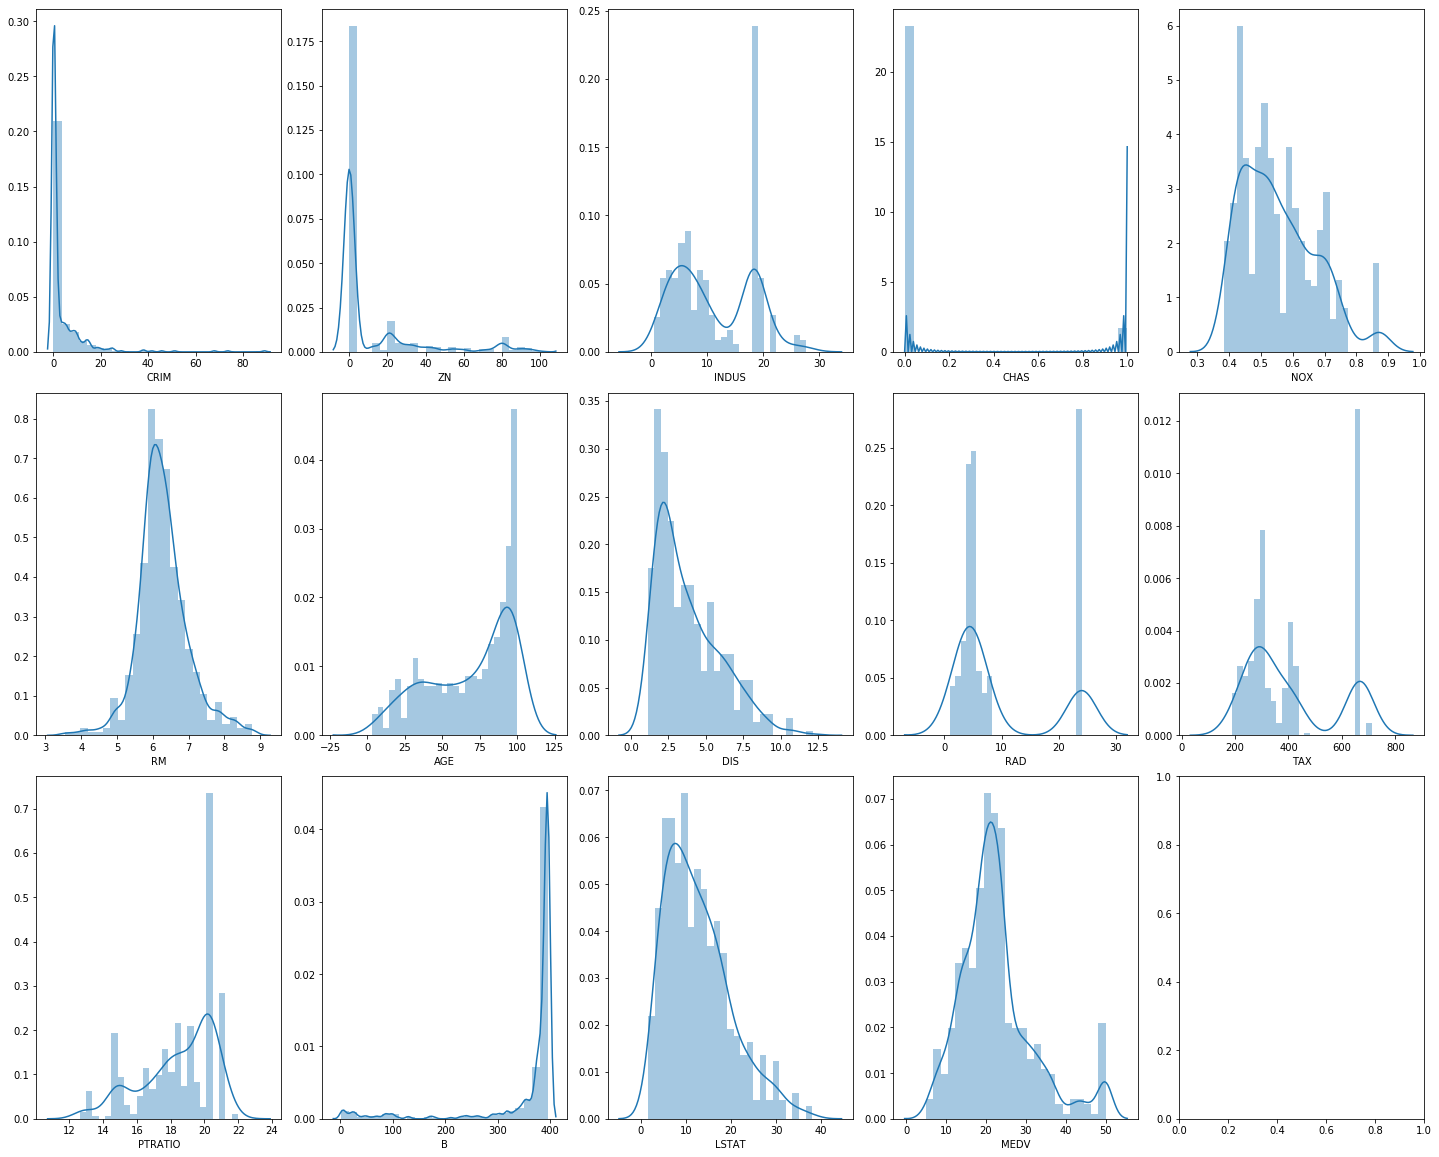

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.distplot(df['CRIM'], bins=25, ax=axs[0, 0])
sns.distplot(df['ZN'], bins=25, ax=axs[0, 1])
sns.distplot(df['INDUS'], bins=25, ax=axs[0, 2])
sns.distplot(df['CHAS'], bins=25, ax=axs[0, 3])
sns.distplot(df['NOX'], bins=25, ax=axs[0, 4])
sns.distplot(df['RM'], bins=25, ax=axs[1, 0])
sns.distplot(df['AGE'], bins=25, ax=axs[1, 1])
sns.distplot(df['DIS'], bins=25, ax=axs[1, 2])
sns.distplot(df['RAD'], bins=25, ax=axs[1, 3])
sns.distplot(df['TAX'], bins=25, ax=axs[1, 4])
sns.distplot(df['PTRATIO'], bins=25, ax=axs[2, 0])
sns.distplot(df['B'], bins=25, ax=axs[2, 1])
sns.distplot(df['LSTAT'], bins=25, ax=axs[2, 2])
sns.distplot(df['MEDV'], bins=25, ax=axs[2, 3])
plt.show()

From this we can see the distribution for each data column. We can see that the RM values are in a Gaussian Normal distribution. The values for CHAS are binomial with values of either 0 or 1. The distributions for DIS, LSTAT and NOX seem to follow the lognormal distribution. It's also worth noting that the values for RAD are generally centered around 10 in an almost Gaussian distribution except for a large spike around 24. It is quite similar to the TAX distibution.

Another option is to generate boxplots for each variable. This can be useful to sometimes identify other traits of the data.

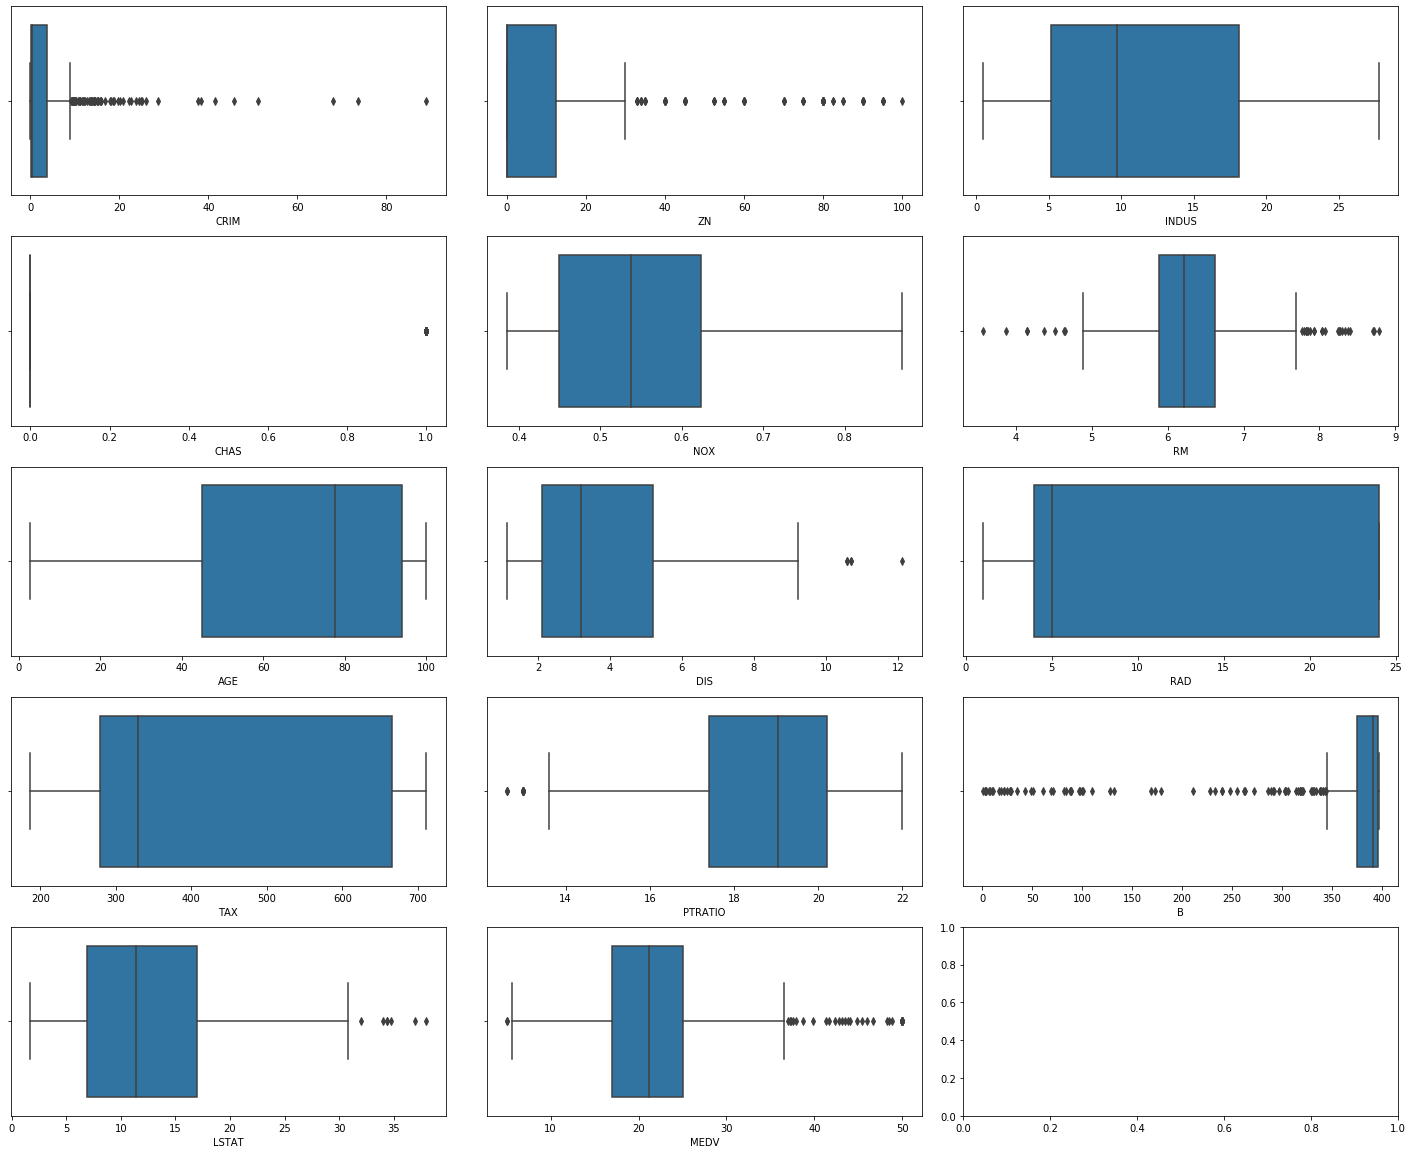

In [14]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.boxplot(x=df['CRIM'], ax=axs[0, 0])
sns.boxplot(x=df['ZN'], ax=axs[0, 1])
sns.boxplot(x=df['INDUS'], ax=axs[0, 2])
sns.boxplot(x=df['CHAS'], ax=axs[1, 0])
sns.boxplot(x=df['NOX'], ax=axs[1, 1])
sns.boxplot(x=df['RM'], ax=axs[1, 2])
sns.boxplot(x=df['AGE'], ax=axs[2, 0])
sns.boxplot(x=df['DIS'], ax=axs[2, 1])
sns.boxplot(x=df['RAD'], ax=axs[2, 2])
sns.boxplot(x=df['TAX'], ax=axs[3, 0])
sns.boxplot(x=df['PTRATIO'], ax=axs[3, 1])
sns.boxplot(x=df['B'], ax=axs[3, 2])
sns.boxplot(x=df['LSTAT'], ax=axs[4, 0])
sns.boxplot(x=df['MEDV'], ax=axs[4, 1])
plt.show()

From this, it can be observed that the values of NOX are all between 0 and 1, with no values outside the 'minimum' or 'maximum' values of the boxplot. For the variable B, there are numerous outliers lower than the value 'minimum' boxplot values. The boxplots are very useful for understanding the median values of each variable.

Another attribute of the datat that might be useful to investigate would be the covariance and correlation of the variables. 
Covariance shows how variables differ from each other (higher this value the more dependent is the relationship) while correlation shows the relationship between them on a scale between -1 and 1 (values close to 1 and -1 indicate either a strong positive or negative relationship). 

In [15]:
df.cov().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,73.987,-40.216,23.992,-0.122,0.420,-1.325,85.405,-6.877,46.848,844.822,5.399,-302.382,27.986,-30.719
ZN,-40.216,543.937,-85.413,-0.253,-1.396,5.113,-373.902,32.629,-63.349,-1236.454,-19.777,373.721,-68.783,77.315
INDUS,23.992,-85.413,47.064,0.110,0.607,-1.888,124.514,-10.228,35.550,833.360,5.692,-223.580,29.580,-30.521
CHAS,-0.122,-0.253,0.110,0.065,0.003,0.016,0.619,-0.053,-0.016,-1.523,-0.067,1.131,-0.098,0.409
NOX,0.420,-1.396,0.607,0.003,0.013,-0.025,2.386,-0.188,0.617,13.046,0.047,-4.021,0.489,-0.455
RM,-1.325,5.113,-1.888,0.016,-0.025,0.494,-4.752,0.304,-1.284,-34.583,-0.541,8.215,-3.080,4.493
AGE,85.405,-373.902,124.514,0.619,2.386,-4.752,792.358,-44.329,111.771,2402.690,15.937,-702.940,121.078,-97.589
DIS,-6.877,32.629,-10.228,-0.053,-0.188,0.304,-44.329,4.434,-9.068,-189.665,-1.060,56.040,-7.473,4.840
RAD,46.848,-63.349,35.550,-0.016,0.617,-1.284,111.771,-9.068,75.816,1335.757,8.761,-353.276,30.385,-30.561
TAX,844.822,-1236.454,833.360,-1.523,13.046,-34.583,2402.690,-189.665,1335.757,28404.759,168.153,-6797.911,654.715,-726.256


In [16]:
df.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


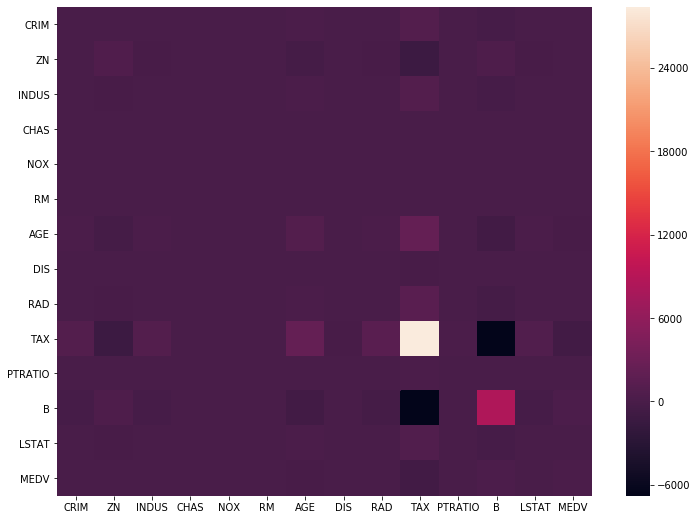

In [17]:
plt.subplots(figsize=(12,9))
covariance_matrix = df.cov().round(20)
sns.heatmap(data=covariance_matrix, annot=False)

Because of the scale and size of the results of the covariance it is very hard to really tell anything from this plot. 

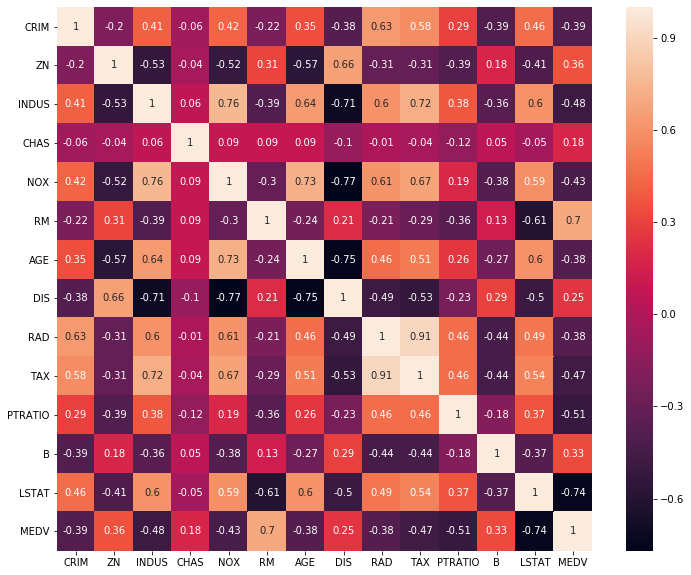

In [100]:
# Adapted from [1]
plt.subplots(figsize=(12,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Very light or very dark squares indicate the variables with the highest (either positive or negative) correlation. Some variable pairing that might be worth a closer inspection are LSAT/MEDV, DIS/AGE, TAX/RAD, NOX/INDUS

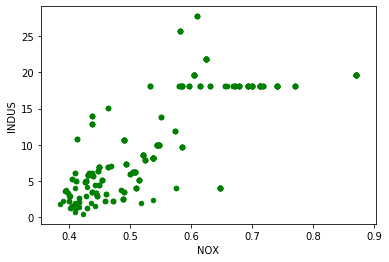

In [19]:
df.plot(kind='scatter',x='NOX',y='INDUS', color="green")
plt.show()

The scatter plot for these variables indicate that there is a clear relationship between NOX and INDUS. As the % of Industrial units increase so does the level of NOX. 

Looking at the correlations matrix results for TAX and RAD, we see a value of 0.91 returned. This would indicate a high correlation between the two variables. However when we look at a scatter plot between them we see that there are a couple of outlier values that skew the correlation results. Looking at the plot it is hard to see any real correlation between them. This example is useful to remind ourselves not to look at single aspects of analysis and jumping to conclusions.

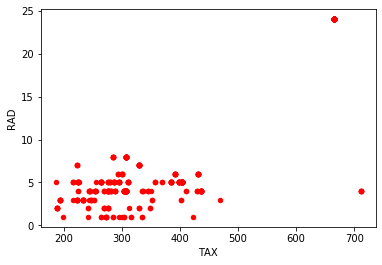

In [20]:
df.plot(kind='scatter',x='TAX',y='RAD', color="red")
plt.show()

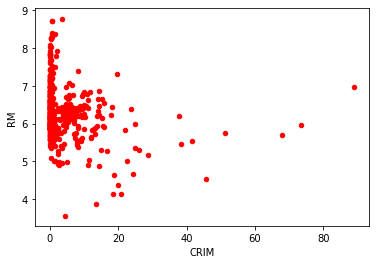

In [21]:
df.plot(kind='scatter',x='CRIM',y='RM',color='red')
plt.show()

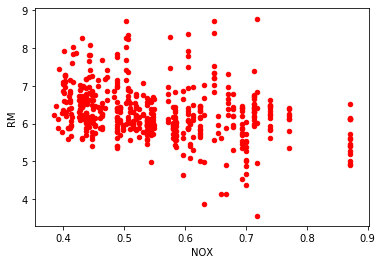

In [22]:
df.plot(kind='scatter',x='NOX',y='RM',color='red')
plt.show()

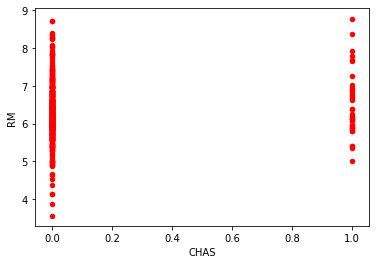

In [23]:
df.plot(kind='scatter',x='CHAS',y='RM',color='red')
plt.show()

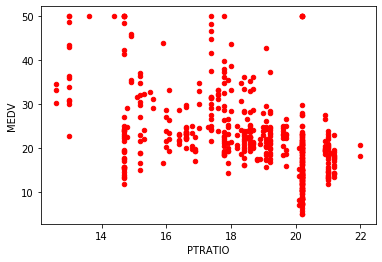

In [24]:
df.plot(kind='scatter',x='PTRATIO',y='MEDV',color='red')
plt.show()

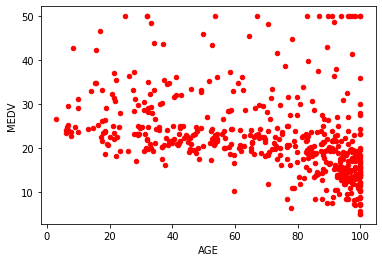

In [25]:
df.plot(kind='scatter',x='AGE',y='MEDV',color='red')
plt.show()

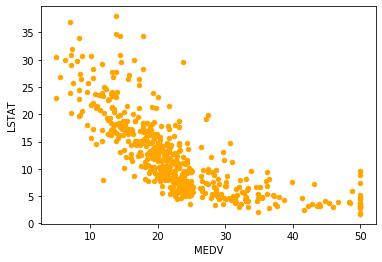

In [26]:
df.plot(kind='scatter',x='MEDV',y='LSTAT',color='orange')
plt.show()

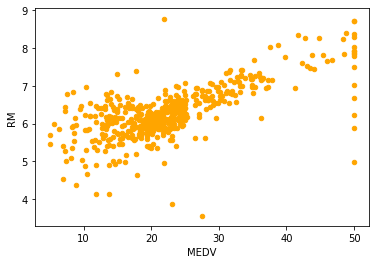

In [27]:
df.plot(kind='scatter',x='MEDV',y='RM',color='orange')
plt.show()

In [28]:
np.polyfit(df['MEDV'], df['LSTAT'], 1)

array([-0.57275582, 25.55885923])

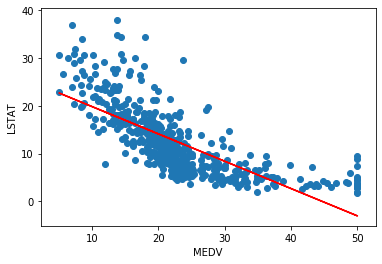

In [29]:
plt.plot(df['MEDV'], df['MEDV'] * -0.5727 + 25.55885, 'r-')
plt.scatter(df['MEDV'], df['LSTAT'])
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.show()

***
## Section 2 - Inferential

A ttest is a type of inferential statistics test used to determine if there is a significant different between the means of two groups of data which may be related in certain features.

For this experiment I want to see the ttest statistics and pvalues for each variable in the dataset run against the all of the others. From the initial analysis we can see there is no correlation between a lot of the variables but I still think it will be interesting to see this plotted.

In [30]:
df_results = pd.DataFrame(columns=['Var1', 'Var2','ttest Statistic','ttest Pvalue'])
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue


In [31]:
#defining empty lists that will store the results of the ttest loop
v1 = []
v2 = []
S = []
P = []

In [32]:
# Creating a for loop that will run a tt for each variable against each other variable.
for column in df:
    for column1 in df:
        result = ss.ttest_ind(df[column], df[column1])
        #print(column, column1, result.statistic, result.pvalue)
        v1.append(column)
        v2.append(column1)
        S.append(result.statistic)
        P.append(result.pvalue)

In [33]:
df_results['Var1'] = v1
df_results['Var2'] = v2
df_results['ttest Statistic'] = S
df_results['ttest Pvalue'] = P
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue
0,CRIM,CRIM,0.000000,1.000000e+00
1,CRIM,ZN,-7.013196,4.259687e-12
2,CRIM,INDUS,-15.381434,3.988806e-48
3,CRIM,CHAS,9.265024,1.141922e-19
4,CRIM,NOX,7.998610,3.430040e-15
5,CRIM,RM,-6.962202,6.024193e-12
6,CRIM,AGE,-49.646090,3.097115e-273
7,CRIM,DIS,-0.461087,6.448357e-01
8,CRIM,RAD,-10.909390,2.842063e-26
9,CRIM,TAX,-53.934427,1.251318e-299


In [34]:
# Removing the rows where the ttest was conducted on the same set of values eg ss.ttest_ind(CRIM, CRIM)
df_results = df_results.drop([0,15,30,45,60,75,90,105,120,135,150,165,180,195], axis=0)

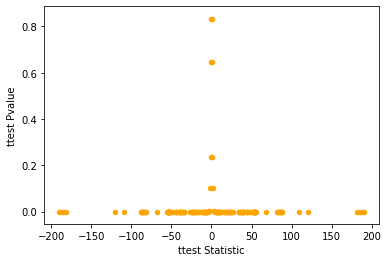

In [35]:
df_results.plot(kind='scatter',x='ttest Statistic',y='ttest Pvalue',color='orange')
plt.show()

Looking at this scatter plot, it looks like there are only 2 pairs of variables with a ttest pvalue above 0.5%, that might be significant. First we'll sort the data to find the tests where the P value is greater than 0.5%.

In [36]:
df_results.sort_values(by='ttest Pvalue', ascending=False).head(10)

,Var1,Var2,ttest Statistic,ttest Pvalue
29,INDUS,ZN,-0.209911,0.833780
16,ZN,INDUS,0.209911,0.833780
98,DIS,CRIM,0.461087,0.644836
7,CRIM,DIS,-0.461087,0.644836
169,LSTAT,ZN,1.189155,0.234658
26,ZN,LSTAT,-1.189155,0.234658
113,RAD,ZN,-1.639298,0.101463
22,ZN,RAD,1.639298,0.101463
36,INDUS,RAD,3.221156,0.001318
114,RAD,INDUS,-3.221156,0.001318


INDUS / ZN and DIS / CRIM are the two pairs of variables that indicate there is a relationship between them, based on the ttest results. We can plot these on a scatter plot to give us a different view to what is going on here.

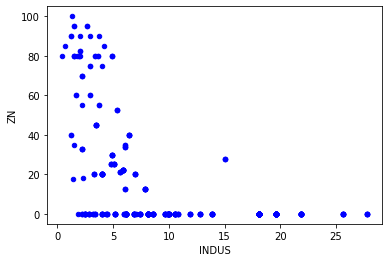

In [37]:
df.plot(kind='scatter',x='INDUS',y='ZN',color='blue')
plt.show()

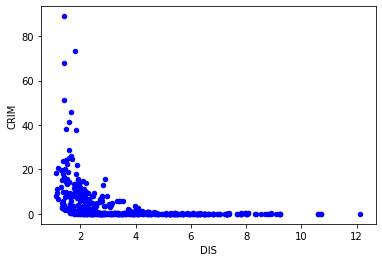

In [38]:
df.plot(kind='scatter',x='DIS',y='CRIM',color='blue')
plt.show()

From this, we could infer that as the proportion of non retail business per town (INDUS) increases the proportion of residential land zones (ZN) decreased. Similarly, as the distance to one of the Boston Employment Centre (DIS) increases, the per capaita crime rate decreases.

To look at the specific case of whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t, we can look at the ttest results for these two variables.

In [39]:
ss.ttest_ind(df['CHAS'], df['MEDV'])

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

From this result we would accept the null hypothesis and conclude that there is no significant relationship between these variables.

However it could also be useful to see these two variables in a scatter plot. (For the CHAS variable, 1 indicates that the house is along the Charles river while 0 means it is not)

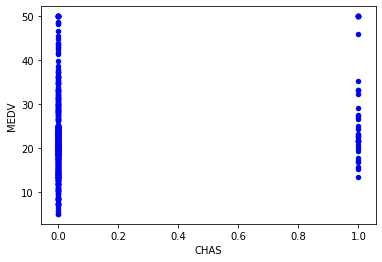

In [40]:
df.plot(kind='scatter',x='CHAS',y='MEDV',color='blue')
plt.show()

Looking at the scatter plot, it looks like the MEDV is pretty evenly distributed for both sets of values of CHAS. There are more houses in the lowest MEDV values when CHAS is 0 but if you were to pick any value of MEDV, it would not be possible to conclude if CHAS was 0 or 1.

In [41]:
# creating 2 dataframes based on the values of the CHAS variable
df_chas_0 = df[df['CHAS'] == 0]
df_chas_1 = df[df['CHAS'] == 1]

In [42]:
# Getting the mean values for all values in both new dataframes.
print (df_chas_0.mean())

CRIM         3.744447
ZN          11.634820
INDUS       11.019193
CHAS         0.000000
NOX          0.551817
RM           6.267174
AGE         67.911677
DIS          3.851915
RAD          9.566879
TAX        409.870488
PTRATIO     18.527176
B          355.461040
LSTAT       12.757941
MEDV        22.093843
dtype: float64


In [43]:
print (df_chas_1.mean())

CRIM         1.851670
ZN           7.714286
INDUS       12.719143
CHAS         1.000000
NOX          0.593426
RM           6.519600
AGE         77.500000
DIS          3.029709
RAD          9.314286
TAX        386.257143
PTRATIO     17.491429
B          372.997429
LSTAT       11.241714
MEDV        28.440000
dtype: float64


With these we can see that the average house price located along the Charles river is 28.4 (28,400 dollars) compared with 22.1 (22,100 dollars) for those not along the river.

The conclusion I would come to based on the information available is that although the average house prices are slightly higher located along the Charles river is no major correlation between MEDV and CHAS.

## Section 3 - Predict

To predict the house price we will first select what variables will be used. All variables could be used but if there is no relationship them and the MEDV variable, it may not be necessary. The results of the ttests can be looked at, specifically for MEDV. We will first look at them and sort ascending according to ttest Pvalue.

In [44]:
medv_results = df_results.loc[df_results['Var1'] == 'MEDV']

In [45]:
medv_results.sort_values(by='ttest Pvalue', ascending=False)

,Var1,Var2,ttest Statistic,ttest Pvalue
192,MEDV,PTRATIO,9.706960,2.332590e-21
183,MEDV,ZN,10.021561,1.337148e-22
194,MEDV,LSTAT,19.086255,1.381320e-69
184,MEDV,INDUS,22.341709,3.640811e-90
190,MEDV,RAD,23.059894,7.311700e-95
182,MEDV,CRIM,33.795968,4.137606e-168
188,MEDV,AGE,-34.973905,3.209462e-176
187,MEDV,RM,39.624611,6.490168e-208
189,MEDV,DIS,44.673237,2.033628e-241
191,MEDV,TAX,-51.403010,3.613063e-284


From this, it can be observed that although none of the variable have a ttest value above 5%, the top 5 variables that might indicate some relationship with MEDV are PTRATIO, ZN, LSTAT, INDUS and RAD. These 5 will be selected to try and predict the value of MEDV.

RM will also be added to the inputs as it could be observed from the scatter plot against MEDV there appears to be relationship between these. 

First the inputs and outputs will be declared.

In [46]:
inputs = df[['PTRATIO', 'ZN', 'LSTAT', 'INDUS', 'RAD', 'RM']]
inputsall = df[['PTRATIO', 'ZN', 'LSTAT', 'INDUS', 'RAD', 'CRIM', 'AGE', 'RM', 'DIS', 'TAX', 'NOX', 'CHAS', 'B']]
#inputs = df[['PTRATIO']]

In [47]:
outputs = df[['MEDV']]

In [87]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 6.
model.add(kr.layers.Dense(64, input_dim=6, activation='relu'))
model.add(kr.layers.Dense(10, activation="softplus"))
model.add(kr.layers.Dense(10, activation="relu"))
model.add(kr.layers.Dense(1, activation="softplus"))

# Build the graph./ Try loss mean_squared_error as well.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mae'])

In [49]:
# Split the inputs and outputs into training and test sets.
# inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.5)

In [88]:
# Train the neural network.
history = model.fit(inputs, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 257us/step - loss: 668.9809 - accuracy: 0.0000e+00 - mae: 24.1590 - val_loss: 281.9884 - val_accuracy: 0.0000e+00 - val_mae: 15.9769
Epoch 2/1000
404/404 [==============================] - 0s 32us/step - loss: 648.9063 - accuracy: 0.0000e+00 - mae: 23.7581 - val_loss: 257.5515 - val_accuracy: 0.0000e+00 - val_mae: 15.1839
Epoch 3/1000
404/404 [==============================] - 0s 30us/step - loss: 623.7351 - accuracy: 0.0000e+00 - mae: 23.2019 - val_loss: 248.0072 - val_accuracy: 0.0000e+00 - val_mae: 14.8673
Epoch 4/1000
404/404 [==============================] - 0s 34us/step - loss: 591.8449 - accuracy: 0.0000e+00 - mae: 22.4784 - val_loss: 203.9525 - val_accuracy: 0.0000e+00 - val_mae: 13.2821
Epoch 5/1000
404/404 [==============================] - 0s 30us/step - loss: 494.6552 - accuracy: 0.0025 - mae: 20.0696 - val_loss: 114.7877 - val_accuracy: 0.0000e+00 - val_mae: 9.2221
Epo

404/404 [==============================] - 0s 32us/step - loss: 33.1896 - accuracy: 0.0074 - mae: 4.3066 - val_loss: 24.1378 - val_accuracy: 0.0000e+00 - val_mae: 3.6126
Epoch 46/1000
404/404 [==============================] - 0s 30us/step - loss: 32.7300 - accuracy: 0.0000e+00 - mae: 4.3349 - val_loss: 23.0041 - val_accuracy: 0.0098 - val_mae: 3.5257
Epoch 47/1000
404/404 [==============================] - 0s 30us/step - loss: 31.6864 - accuracy: 0.0025 - mae: 4.2292 - val_loss: 25.8265 - val_accuracy: 0.0098 - val_mae: 3.7692
Epoch 48/1000
404/404 [==============================] - 0s 27us/step - loss: 30.7698 - accuracy: 0.0025 - mae: 4.1687 - val_loss: 24.7487 - val_accuracy: 0.0000e+00 - val_mae: 3.6934
Epoch 49/1000
404/404 [==============================] - 0s 30us/step - loss: 30.1354 - accuracy: 0.0050 - mae: 4.0944 - val_loss: 27.1107 - val_accuracy: 0.0098 - val_mae: 3.8771
Epoch 50/1000
404/404 [==============================] - 0s 30us/step - loss: 28.8490 - accuracy: 0.00

404/404 [==============================] - 0s 35us/step - loss: 15.1012 - accuracy: 0.0124 - mae: 2.7317 - val_loss: 19.4587 - val_accuracy: 0.0098 - val_mae: 3.2388
Epoch 91/1000
404/404 [==============================] - 0s 35us/step - loss: 14.2505 - accuracy: 0.0198 - mae: 2.6062 - val_loss: 20.3923 - val_accuracy: 0.0196 - val_mae: 3.3163
Epoch 92/1000
404/404 [==============================] - 0s 37us/step - loss: 14.1682 - accuracy: 0.0173 - mae: 2.5992 - val_loss: 19.7438 - val_accuracy: 0.0098 - val_mae: 3.2623
Epoch 93/1000
404/404 [==============================] - 0s 32us/step - loss: 14.0254 - accuracy: 0.0124 - mae: 2.5766 - val_loss: 21.6254 - val_accuracy: 0.0098 - val_mae: 3.4647
Epoch 94/1000
404/404 [==============================] - 0s 35us/step - loss: 14.2622 - accuracy: 0.0099 - mae: 2.5616 - val_loss: 20.9858 - val_accuracy: 0.0000e+00 - val_mae: 3.4134
Epoch 95/1000
404/404 [==============================] - 0s 32us/step - loss: 14.6958 - accuracy: 0.0198 - mae

404/404 [==============================] - 0s 32us/step - loss: 14.8925 - accuracy: 0.0198 - mae: 2.6700 - val_loss: 20.1020 - val_accuracy: 0.0000e+00 - val_mae: 3.3644
Epoch 136/1000
404/404 [==============================] - 0s 32us/step - loss: 14.2896 - accuracy: 0.0248 - mae: 2.5895 - val_loss: 23.3901 - val_accuracy: 0.0098 - val_mae: 3.6741
Epoch 137/1000
404/404 [==============================] - 0s 32us/step - loss: 13.6383 - accuracy: 0.0149 - mae: 2.4911 - val_loss: 20.2719 - val_accuracy: 0.0098 - val_mae: 3.3236
Epoch 138/1000
404/404 [==============================] - 0s 35us/step - loss: 13.2167 - accuracy: 0.0248 - mae: 2.4634 - val_loss: 19.8409 - val_accuracy: 0.0196 - val_mae: 3.2821
Epoch 139/1000
404/404 [==============================] - 0s 30us/step - loss: 13.5834 - accuracy: 0.0149 - mae: 2.5025 - val_loss: 20.0264 - val_accuracy: 0.0098 - val_mae: 3.3115
Epoch 140/1000
404/404 [==============================] - 0s 35us/step - loss: 13.6305 - accuracy: 0.0173 

404/404 [==============================] - 0s 32us/step - loss: 13.2977 - accuracy: 0.0272 - mae: 2.4949 - val_loss: 21.3775 - val_accuracy: 0.0196 - val_mae: 3.3907
Epoch 181/1000
404/404 [==============================] - 0s 35us/step - loss: 12.7260 - accuracy: 0.0223 - mae: 2.4385 - val_loss: 23.2633 - val_accuracy: 0.0098 - val_mae: 3.5688
Epoch 182/1000
404/404 [==============================] - 0s 35us/step - loss: 12.7901 - accuracy: 0.0173 - mae: 2.4195 - val_loss: 21.4741 - val_accuracy: 0.0196 - val_mae: 3.3818
Epoch 183/1000
404/404 [==============================] - 0s 35us/step - loss: 12.5744 - accuracy: 0.0248 - mae: 2.4362 - val_loss: 21.9131 - val_accuracy: 0.0196 - val_mae: 3.4288
Epoch 184/1000
404/404 [==============================] - 0s 37us/step - loss: 12.6787 - accuracy: 0.0223 - mae: 2.4551 - val_loss: 20.9526 - val_accuracy: 0.0196 - val_mae: 3.3383
Epoch 185/1000
404/404 [==============================] - 0s 35us/step - loss: 12.6985 - accuracy: 0.0248 - ma

404/404 [==============================] - 0s 30us/step - loss: 13.8981 - accuracy: 0.0074 - mae: 2.6427 - val_loss: 21.7708 - val_accuracy: 0.0000e+00 - val_mae: 3.4432
Epoch 226/1000
404/404 [==============================] - 0s 39us/step - loss: 12.4720 - accuracy: 0.0149 - mae: 2.4605 - val_loss: 21.9445 - val_accuracy: 0.0000e+00 - val_mae: 3.4447
Epoch 227/1000
404/404 [==============================] - 0s 35us/step - loss: 12.5137 - accuracy: 0.0248 - mae: 2.4334 - val_loss: 21.2987 - val_accuracy: 0.0098 - val_mae: 3.4004
Epoch 228/1000
404/404 [==============================] - 0s 32us/step - loss: 11.9824 - accuracy: 0.0173 - mae: 2.3542 - val_loss: 21.0943 - val_accuracy: 0.0196 - val_mae: 3.3772
Epoch 229/1000
404/404 [==============================] - 0s 35us/step - loss: 12.1676 - accuracy: 0.0198 - mae: 2.3727 - val_loss: 21.0771 - val_accuracy: 0.0000e+00 - val_mae: 3.3988
Epoch 230/1000
404/404 [==============================] - 0s 35us/step - loss: 12.2505 - accuracy:

Epoch 270/1000
404/404 [==============================] - 0s 32us/step - loss: 12.0464 - accuracy: 0.0272 - mae: 2.3716 - val_loss: 21.0358 - val_accuracy: 0.0196 - val_mae: 3.3490
Epoch 271/1000
404/404 [==============================] - 0s 32us/step - loss: 12.1529 - accuracy: 0.0124 - mae: 2.3907 - val_loss: 23.4447 - val_accuracy: 0.0196 - val_mae: 3.5356
Epoch 272/1000
404/404 [==============================] - 0s 30us/step - loss: 11.9706 - accuracy: 0.0248 - mae: 2.3966 - val_loss: 22.8382 - val_accuracy: 0.0294 - val_mae: 3.5124
Epoch 273/1000
404/404 [==============================] - 0s 32us/step - loss: 11.7341 - accuracy: 0.0173 - mae: 2.3430 - val_loss: 21.2287 - val_accuracy: 0.0196 - val_mae: 3.4175
Epoch 274/1000
404/404 [==============================] - 0s 35us/step - loss: 12.1789 - accuracy: 0.0297 - mae: 2.4222 - val_loss: 21.1945 - val_accuracy: 0.0196 - val_mae: 3.3715
Epoch 275/1000
404/404 [==============================] - 0s 37us/step - loss: 12.3159 - accura

Epoch 315/1000
404/404 [==============================] - 0s 30us/step - loss: 11.5961 - accuracy: 0.0223 - mae: 2.3177 - val_loss: 22.1629 - val_accuracy: 0.0294 - val_mae: 3.4300
Epoch 316/1000
404/404 [==============================] - 0s 32us/step - loss: 11.2041 - accuracy: 0.0173 - mae: 2.2843 - val_loss: 22.1862 - val_accuracy: 0.0196 - val_mae: 3.4520
Epoch 317/1000
404/404 [==============================] - 0s 35us/step - loss: 11.4823 - accuracy: 0.0272 - mae: 2.3267 - val_loss: 21.2689 - val_accuracy: 0.0098 - val_mae: 3.3969
Epoch 318/1000
404/404 [==============================] - 0s 44us/step - loss: 11.7101 - accuracy: 0.0272 - mae: 2.3437 - val_loss: 24.8800 - val_accuracy: 0.0098 - val_mae: 3.7535
Epoch 319/1000
404/404 [==============================] - 0s 44us/step - loss: 13.6025 - accuracy: 0.0173 - mae: 2.6304 - val_loss: 23.2136 - val_accuracy: 0.0098 - val_mae: 3.5620
Epoch 320/1000
404/404 [==============================] - 0s 32us/step - loss: 13.3197 - accura

Epoch 360/1000
404/404 [==============================] - 0s 35us/step - loss: 11.1032 - accuracy: 0.0272 - mae: 2.2883 - val_loss: 21.6832 - val_accuracy: 0.0196 - val_mae: 3.3898
Epoch 361/1000
404/404 [==============================] - 0s 32us/step - loss: 11.3605 - accuracy: 0.0223 - mae: 2.2990 - val_loss: 21.2350 - val_accuracy: 0.0000e+00 - val_mae: 3.4219
Epoch 362/1000
404/404 [==============================] - 0s 32us/step - loss: 11.3837 - accuracy: 0.0173 - mae: 2.3185 - val_loss: 21.5407 - val_accuracy: 0.0196 - val_mae: 3.3715
Epoch 363/1000
404/404 [==============================] - 0s 35us/step - loss: 11.3432 - accuracy: 0.0223 - mae: 2.3216 - val_loss: 21.6882 - val_accuracy: 0.0000e+00 - val_mae: 3.4901
Epoch 364/1000
404/404 [==============================] - 0s 34us/step - loss: 11.9894 - accuracy: 0.0248 - mae: 2.4187 - val_loss: 22.0235 - val_accuracy: 0.0000e+00 - val_mae: 3.5425
Epoch 365/1000
404/404 [==============================] - 0s 35us/step - loss: 12.4

404/404 [==============================] - 0s 32us/step - loss: 10.9350 - accuracy: 0.0198 - mae: 2.3159 - val_loss: 21.4548 - val_accuracy: 0.0000e+00 - val_mae: 3.4687
Epoch 406/1000
404/404 [==============================] - 0s 32us/step - loss: 12.0055 - accuracy: 0.0248 - mae: 2.4541 - val_loss: 22.3634 - val_accuracy: 0.0000e+00 - val_mae: 3.5357
Epoch 407/1000
404/404 [==============================] - 0s 35us/step - loss: 11.1087 - accuracy: 0.0272 - mae: 2.2983 - val_loss: 20.7172 - val_accuracy: 0.0196 - val_mae: 3.3825
Epoch 408/1000
404/404 [==============================] - 0s 35us/step - loss: 10.8161 - accuracy: 0.0347 - mae: 2.2595 - val_loss: 20.0721 - val_accuracy: 0.0196 - val_mae: 3.3042
Epoch 409/1000
404/404 [==============================] - 0s 30us/step - loss: 10.5575 - accuracy: 0.0198 - mae: 2.2348 - val_loss: 22.6186 - val_accuracy: 0.0098 - val_mae: 3.5049
Epoch 410/1000
404/404 [==============================] - 0s 40us/step - loss: 10.7965 - accuracy: 0.0

404/404 [==============================] - 0s 35us/step - loss: 10.2716 - accuracy: 0.0248 - mae: 2.1908 - val_loss: 21.6009 - val_accuracy: 0.0196 - val_mae: 3.3915
Epoch 451/1000
404/404 [==============================] - 0s 32us/step - loss: 10.7005 - accuracy: 0.0297 - mae: 2.2447 - val_loss: 22.1058 - val_accuracy: 0.0196 - val_mae: 3.4406
Epoch 452/1000
404/404 [==============================] - 0s 35us/step - loss: 10.2831 - accuracy: 0.0248 - mae: 2.1996 - val_loss: 22.0482 - val_accuracy: 0.0098 - val_mae: 3.4882
Epoch 453/1000
404/404 [==============================] - 0s 32us/step - loss: 10.5707 - accuracy: 0.0272 - mae: 2.2228 - val_loss: 22.3772 - val_accuracy: 0.0196 - val_mae: 3.4893
Epoch 454/1000
404/404 [==============================] - 0s 32us/step - loss: 10.5452 - accuracy: 0.0099 - mae: 2.2387 - val_loss: 22.6546 - val_accuracy: 0.0000e+00 - val_mae: 3.5106
Epoch 455/1000
404/404 [==============================] - 0s 30us/step - loss: 10.5128 - accuracy: 0.0198 

404/404 [==============================] - 0s 30us/step - loss: 10.0008 - accuracy: 0.0297 - mae: 2.1675 - val_loss: 21.6267 - val_accuracy: 0.0000e+00 - val_mae: 3.4873
Epoch 496/1000
404/404 [==============================] - 0s 32us/step - loss: 10.0434 - accuracy: 0.0297 - mae: 2.1684 - val_loss: 21.6756 - val_accuracy: 0.0196 - val_mae: 3.4207
Epoch 497/1000
404/404 [==============================] - 0s 35us/step - loss: 10.2152 - accuracy: 0.0297 - mae: 2.1599 - val_loss: 20.9801 - val_accuracy: 0.0196 - val_mae: 3.4081
Epoch 498/1000
404/404 [==============================] - 0s 30us/step - loss: 10.2951 - accuracy: 0.0248 - mae: 2.2205 - val_loss: 22.3158 - val_accuracy: 0.0196 - val_mae: 3.4441
Epoch 499/1000
404/404 [==============================] - 0s 30us/step - loss: 10.2382 - accuracy: 0.0322 - mae: 2.1719 - val_loss: 21.5090 - val_accuracy: 0.0098 - val_mae: 3.4740
Epoch 500/1000
404/404 [==============================] - 0s 32us/step - loss: 11.0264 - accuracy: 0.0198 

404/404 [==============================] - 0s 32us/step - loss: 9.6533 - accuracy: 0.0248 - mae: 2.1316 - val_loss: 22.0884 - val_accuracy: 0.0098 - val_mae: 3.4825
Epoch 541/1000
404/404 [==============================] - 0s 32us/step - loss: 9.9029 - accuracy: 0.0272 - mae: 2.1599 - val_loss: 22.7902 - val_accuracy: 0.0098 - val_mae: 3.5650
Epoch 542/1000
404/404 [==============================] - 0s 30us/step - loss: 9.7782 - accuracy: 0.0198 - mae: 2.1642 - val_loss: 22.1645 - val_accuracy: 0.0098 - val_mae: 3.5536
Epoch 543/1000
404/404 [==============================] - 0s 30us/step - loss: 9.7893 - accuracy: 0.0347 - mae: 2.1551 - val_loss: 22.9233 - val_accuracy: 0.0098 - val_mae: 3.5492
Epoch 544/1000
404/404 [==============================] - 0s 32us/step - loss: 9.7360 - accuracy: 0.0223 - mae: 2.1161 - val_loss: 23.7273 - val_accuracy: 0.0098 - val_mae: 3.5842
Epoch 545/1000
404/404 [==============================] - 0s 30us/step - loss: 9.7620 - accuracy: 0.0248 - mae: 2.1

404/404 [==============================] - 0s 32us/step - loss: 9.6977 - accuracy: 0.0223 - mae: 2.1371 - val_loss: 22.9437 - val_accuracy: 0.0098 - val_mae: 3.5443
Epoch 586/1000
404/404 [==============================] - 0s 32us/step - loss: 9.5544 - accuracy: 0.0173 - mae: 2.1572 - val_loss: 22.4739 - val_accuracy: 0.0098 - val_mae: 3.5838
Epoch 587/1000
404/404 [==============================] - 0s 35us/step - loss: 9.6988 - accuracy: 0.0223 - mae: 2.1583 - val_loss: 22.0805 - val_accuracy: 0.0098 - val_mae: 3.5261
Epoch 588/1000
404/404 [==============================] - 0s 35us/step - loss: 9.3826 - accuracy: 0.0322 - mae: 2.1058 - val_loss: 23.2153 - val_accuracy: 0.0098 - val_mae: 3.5888
Epoch 589/1000
404/404 [==============================] - 0s 32us/step - loss: 9.8211 - accuracy: 0.0248 - mae: 2.1404 - val_loss: 23.8008 - val_accuracy: 0.0098 - val_mae: 3.6363
Epoch 590/1000
404/404 [==============================] - 0s 32us/step - loss: 9.7178 - accuracy: 0.0223 - mae: 2.1

404/404 [==============================] - 0s 37us/step - loss: 9.2505 - accuracy: 0.0248 - mae: 2.0713 - val_loss: 22.2195 - val_accuracy: 0.0098 - val_mae: 3.5370
Epoch 631/1000
404/404 [==============================] - 0s 32us/step - loss: 9.5586 - accuracy: 0.0223 - mae: 2.1484 - val_loss: 22.7883 - val_accuracy: 0.0098 - val_mae: 3.5435
Epoch 632/1000
404/404 [==============================] - 0s 32us/step - loss: 9.2303 - accuracy: 0.0223 - mae: 2.1064 - val_loss: 21.8229 - val_accuracy: 0.0098 - val_mae: 3.5173
Epoch 633/1000
404/404 [==============================] - 0s 32us/step - loss: 9.2597 - accuracy: 0.0272 - mae: 2.0816 - val_loss: 22.0317 - val_accuracy: 0.0098 - val_mae: 3.5179
Epoch 634/1000
404/404 [==============================] - 0s 32us/step - loss: 9.0883 - accuracy: 0.0198 - mae: 2.0750 - val_loss: 21.4665 - val_accuracy: 0.0098 - val_mae: 3.5047
Epoch 635/1000
404/404 [==============================] - 0s 35us/step - loss: 9.2141 - accuracy: 0.0198 - mae: 2.1

404/404 [==============================] - 0s 34us/step - loss: 9.4539 - accuracy: 0.0149 - mae: 2.1369 - val_loss: 23.9514 - val_accuracy: 0.0098 - val_mae: 3.6429
Epoch 676/1000
404/404 [==============================] - 0s 35us/step - loss: 9.4761 - accuracy: 0.0149 - mae: 2.1757 - val_loss: 21.7403 - val_accuracy: 0.0098 - val_mae: 3.4970
Epoch 677/1000
404/404 [==============================] - 0s 35us/step - loss: 8.7249 - accuracy: 0.0297 - mae: 2.0282 - val_loss: 24.0767 - val_accuracy: 0.0098 - val_mae: 3.6348
Epoch 678/1000
404/404 [==============================] - 0s 35us/step - loss: 9.0150 - accuracy: 0.0272 - mae: 2.1133 - val_loss: 22.2347 - val_accuracy: 0.0098 - val_mae: 3.5096
Epoch 679/1000
404/404 [==============================] - 0s 32us/step - loss: 8.9894 - accuracy: 0.0173 - mae: 2.0963 - val_loss: 23.2018 - val_accuracy: 0.0098 - val_mae: 3.6081
Epoch 680/1000
404/404 [==============================] - 0s 32us/step - loss: 9.0334 - accuracy: 0.0198 - mae: 2.1

404/404 [==============================] - 0s 35us/step - loss: 8.8586 - accuracy: 0.0223 - mae: 2.0414 - val_loss: 22.7257 - val_accuracy: 0.0098 - val_mae: 3.5884
Epoch 721/1000
404/404 [==============================] - 0s 32us/step - loss: 8.7297 - accuracy: 0.0272 - mae: 2.0964 - val_loss: 24.9226 - val_accuracy: 0.0196 - val_mae: 3.6694
Epoch 722/1000
404/404 [==============================] - 0s 32us/step - loss: 8.7030 - accuracy: 0.0297 - mae: 2.0556 - val_loss: 23.5768 - val_accuracy: 0.0098 - val_mae: 3.6219
Epoch 723/1000
404/404 [==============================] - 0s 32us/step - loss: 8.6860 - accuracy: 0.0248 - mae: 2.0684 - val_loss: 23.9591 - val_accuracy: 0.0098 - val_mae: 3.6219
Epoch 724/1000
404/404 [==============================] - 0s 30us/step - loss: 8.8537 - accuracy: 0.0223 - mae: 2.0763 - val_loss: 23.5382 - val_accuracy: 0.0098 - val_mae: 3.5871
Epoch 725/1000
404/404 [==============================] - 0s 32us/step - loss: 8.7926 - accuracy: 0.0149 - mae: 2.0

404/404 [==============================] - 0s 34us/step - loss: 8.3358 - accuracy: 0.0248 - mae: 2.0114 - val_loss: 21.8579 - val_accuracy: 0.0098 - val_mae: 3.5775
Epoch 766/1000
404/404 [==============================] - 0s 32us/step - loss: 8.3722 - accuracy: 0.0198 - mae: 1.9812 - val_loss: 24.1809 - val_accuracy: 0.0196 - val_mae: 3.6142
Epoch 767/1000
404/404 [==============================] - 0s 30us/step - loss: 8.6050 - accuracy: 0.0297 - mae: 2.0327 - val_loss: 21.4447 - val_accuracy: 0.0098 - val_mae: 3.5836
Epoch 768/1000
404/404 [==============================] - 0s 32us/step - loss: 8.2349 - accuracy: 0.0297 - mae: 2.0154 - val_loss: 21.2580 - val_accuracy: 0.0098 - val_mae: 3.4295
Epoch 769/1000
404/404 [==============================] - 0s 32us/step - loss: 8.4997 - accuracy: 0.0272 - mae: 2.0329 - val_loss: 22.6828 - val_accuracy: 0.0098 - val_mae: 3.5214
Epoch 770/1000
404/404 [==============================] - 0s 30us/step - loss: 9.3596 - accuracy: 0.0050 - mae: 2.1

404/404 [==============================] - 0s 35us/step - loss: 8.2496 - accuracy: 0.0297 - mae: 2.0011 - val_loss: 22.1425 - val_accuracy: 0.0098 - val_mae: 3.4909
Epoch 811/1000
404/404 [==============================] - 0s 35us/step - loss: 8.1838 - accuracy: 0.0248 - mae: 2.0429 - val_loss: 21.5429 - val_accuracy: 0.0098 - val_mae: 3.5003
Epoch 812/1000
404/404 [==============================] - 0s 32us/step - loss: 8.2200 - accuracy: 0.0223 - mae: 1.9960 - val_loss: 24.3265 - val_accuracy: 0.0098 - val_mae: 3.6197
Epoch 813/1000
404/404 [==============================] - 0s 32us/step - loss: 8.0821 - accuracy: 0.0371 - mae: 2.0149 - val_loss: 22.1634 - val_accuracy: 0.0098 - val_mae: 3.5313
Epoch 814/1000
404/404 [==============================] - 0s 32us/step - loss: 8.2378 - accuracy: 0.0223 - mae: 2.0204 - val_loss: 22.8830 - val_accuracy: 0.0098 - val_mae: 3.5139
Epoch 815/1000
404/404 [==============================] - 0s 32us/step - loss: 8.3398 - accuracy: 0.0297 - mae: 1.9

404/404 [==============================] - 0s 35us/step - loss: 8.2813 - accuracy: 0.0297 - mae: 2.0133 - val_loss: 23.7942 - val_accuracy: 0.0098 - val_mae: 3.5752
Epoch 856/1000
404/404 [==============================] - 0s 30us/step - loss: 8.6095 - accuracy: 0.0223 - mae: 2.0869 - val_loss: 25.5337 - val_accuracy: 0.0196 - val_mae: 3.7090
Epoch 857/1000
404/404 [==============================] - 0s 30us/step - loss: 8.2919 - accuracy: 0.0248 - mae: 1.9992 - val_loss: 23.8539 - val_accuracy: 0.0098 - val_mae: 3.5769
Epoch 858/1000
404/404 [==============================] - 0s 30us/step - loss: 7.8567 - accuracy: 0.0223 - mae: 1.9979 - val_loss: 22.5213 - val_accuracy: 0.0098 - val_mae: 3.4614
Epoch 859/1000
404/404 [==============================] - 0s 30us/step - loss: 8.4849 - accuracy: 0.0173 - mae: 2.0651 - val_loss: 21.5905 - val_accuracy: 0.0098 - val_mae: 3.4981
Epoch 860/1000
404/404 [==============================] - 0s 30us/step - loss: 8.3777 - accuracy: 0.0248 - mae: 2.0

404/404 [==============================] - 0s 30us/step - loss: 7.6733 - accuracy: 0.0223 - mae: 1.9256 - val_loss: 22.6853 - val_accuracy: 0.0098 - val_mae: 3.5050
Epoch 901/1000
404/404 [==============================] - 0s 30us/step - loss: 7.8714 - accuracy: 0.0396 - mae: 1.9449 - val_loss: 22.4476 - val_accuracy: 0.0196 - val_mae: 3.4289
Epoch 902/1000
404/404 [==============================] - 0s 35us/step - loss: 7.7893 - accuracy: 0.0272 - mae: 1.9220 - val_loss: 25.0181 - val_accuracy: 0.0098 - val_mae: 3.6549
Epoch 903/1000
404/404 [==============================] - 0s 32us/step - loss: 8.3770 - accuracy: 0.0198 - mae: 2.0362 - val_loss: 22.5036 - val_accuracy: 0.0098 - val_mae: 3.4653
Epoch 904/1000
404/404 [==============================] - 0s 35us/step - loss: 7.8141 - accuracy: 0.0272 - mae: 1.9403 - val_loss: 22.8597 - val_accuracy: 0.0098 - val_mae: 3.4933
Epoch 905/1000
404/404 [==============================] - 0s 32us/step - loss: 8.0714 - accuracy: 0.0272 - mae: 1.9

404/404 [==============================] - 0s 32us/step - loss: 8.3429 - accuracy: 0.0223 - mae: 2.0284 - val_loss: 21.1600 - val_accuracy: 0.0098 - val_mae: 3.4281
Epoch 946/1000
404/404 [==============================] - 0s 35us/step - loss: 7.6484 - accuracy: 0.0272 - mae: 1.9392 - val_loss: 24.2820 - val_accuracy: 0.0196 - val_mae: 3.5689
Epoch 947/1000
404/404 [==============================] - 0s 32us/step - loss: 8.4890 - accuracy: 0.0223 - mae: 2.1070 - val_loss: 26.8991 - val_accuracy: 0.0196 - val_mae: 3.7537
Epoch 948/1000
404/404 [==============================] - 0s 30us/step - loss: 8.2397 - accuracy: 0.0297 - mae: 2.0505 - val_loss: 23.9090 - val_accuracy: 0.0196 - val_mae: 3.5158
Epoch 949/1000
404/404 [==============================] - 0s 32us/step - loss: 8.6579 - accuracy: 0.0272 - mae: 2.1011 - val_loss: 25.5859 - val_accuracy: 0.0098 - val_mae: 3.6945
Epoch 950/1000
404/404 [==============================] - 0s 32us/step - loss: 9.5874 - accuracy: 0.0149 - mae: 2.2

404/404 [==============================] - 0s 30us/step - loss: 7.5266 - accuracy: 0.0272 - mae: 1.9609 - val_loss: 22.5419 - val_accuracy: 0.0098 - val_mae: 3.4866
Epoch 991/1000
404/404 [==============================] - 0s 32us/step - loss: 7.6129 - accuracy: 0.0223 - mae: 1.9312 - val_loss: 23.5713 - val_accuracy: 0.0098 - val_mae: 3.5288
Epoch 992/1000
404/404 [==============================] - 0s 32us/step - loss: 7.8390 - accuracy: 0.0248 - mae: 2.0322 - val_loss: 23.5948 - val_accuracy: 0.0098 - val_mae: 3.4728
Epoch 993/1000
404/404 [==============================] - 0s 30us/step - loss: 7.5927 - accuracy: 0.0248 - mae: 1.9746 - val_loss: 23.2154 - val_accuracy: 0.0098 - val_mae: 3.5603
Epoch 994/1000
404/404 [==============================] - 0s 30us/step - loss: 7.8199 - accuracy: 0.0297 - mae: 1.9888 - val_loss: 22.8407 - val_accuracy: 0.0098 - val_mae: 3.4367
Epoch 995/1000
404/404 [==============================] - 0s 30us/step - loss: 7.6078 - accuracy: 0.0297 - mae: 1.9

In [51]:
#p = model.predict(inputs_test.as_matrix()[0:1])
p = model.predict(inputs)

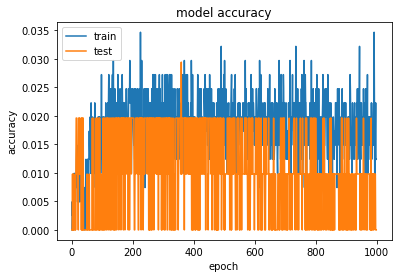

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

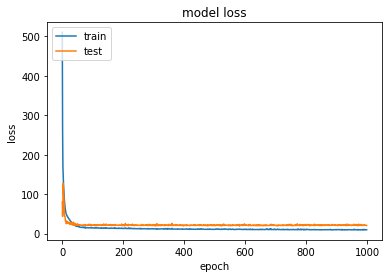

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

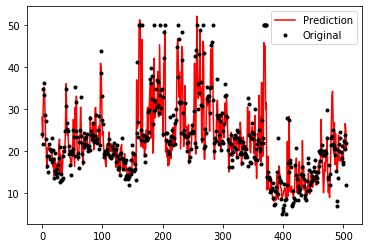

In [54]:
plt.plot(p, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

### Pre processing & Whitening

Pre processing is a technique where the data input is standardised to fit a normally distibuted dataset i.e. Gaussian with zero mean and unit variance. The learning estimators used in scikit-learn may not return the most accurate results if the data doesn't fit this distribution.[3]

Whitening is a method to remove the correlation between variables that can sometimes be useful in predictions in neural networks.

In [55]:
inputsscale = pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
inputsscale

,PTRATIO,ZN,LSTAT,INDUS,RAD,RM
0,-1.459000,0.284830,-1.075562,-1.287909,-0.982843,0.413672
1,-0.303094,-0.487722,-0.492439,-0.593381,-0.867883,0.194274
2,-0.303094,-0.487722,-1.208727,-0.593381,-0.867883,1.282714
3,0.113032,-0.487722,-1.361517,-1.306878,-0.752922,1.016303
4,0.113032,-0.487722,-1.026501,-1.306878,-0.752922,1.228577
5,0.113032,-0.487722,-1.043322,-1.306878,-0.752922,0.207096
6,-1.505237,0.048772,-0.031268,-0.476654,-0.523001,-0.388411
7,-1.505237,0.048772,0.910700,-0.476654,-0.523001,-0.160466
8,-1.505237,0.048772,2.421774,-0.476654,-0.523001,-0.931206
9,-1.505237,0.048772,0.623344,-0.476654,-0.523001,-0.399808


In [56]:
pca = dec.PCA(n_components=6, whiten=True)
pca.fit(inputsscale)
inputsscale_white = pd.DataFrame(pca.transform(inputsscale), columns=inputsscale.columns)
inputsscale_white

,PTRATIO,ZN,LSTAT,INDUS,RAD,RM
0,1.281734,-0.493090,-0.573601,-0.453632,-0.439274,1.034806
1,0.474774,-0.299547,-1.123941,0.162312,-0.276017,0.112677
2,0.882789,0.792994,-1.469129,0.124334,-0.024872,-0.184165
3,0.939005,0.679700,-1.387455,1.003484,-0.638212,0.480430
4,0.896590,0.729896,-1.321512,0.865258,-1.064328,-0.042626
5,0.690742,-0.059016,-1.190993,1.090785,-0.610419,0.911142
6,0.494851,-1.057353,-0.186110,-1.126918,-0.423808,0.901753
7,0.299689,-1.203217,0.048146,-1.435795,-1.464077,-0.230429
8,-0.247198,-2.321296,0.574389,-1.685542,-2.646592,-1.003901
9,0.324288,-1.290824,-0.000834,-1.304849,-1.074076,0.270764


In [90]:
# Train the neural network.
history2 = model.fit(inputsscale_white, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 35us/step - loss: 3.2596 - accuracy: 0.0495 - mae: 1.2366 - val_loss: 35.5879 - val_accuracy: 0.0196 - val_mae: 4.2556
Epoch 2/1000
404/404 [==============================] - 0s 32us/step - loss: 3.0515 - accuracy: 0.0569 - mae: 1.1603 - val_loss: 34.6923 - val_accuracy: 0.0196 - val_mae: 4.2416
Epoch 3/1000
404/404 [==============================] - 0s 35us/step - loss: 3.0708 - accuracy: 0.0520 - mae: 1.1628 - val_loss: 34.0364 - val_accuracy: 0.0196 - val_mae: 4.1842
Epoch 4/1000
404/404 [==============================] - 0s 32us/step - loss: 3.0597 - accuracy: 0.0545 - mae: 1.1598 - val_loss: 34.0035 - val_accuracy: 0.0098 - val_mae: 4.1894
Epoch 5/1000
404/404 [==============================] - 0s 32us/step - loss: 3.0609 - accuracy: 0.0520 - mae: 1.1487 - val_loss: 34.2324 - val_accuracy: 0.0196 - val_mae: 4.1904
Epoch 6/1000
404/404 [==============================] - 0s 35us/

404/404 [==============================] - 0s 30us/step - loss: 2.9748 - accuracy: 0.0520 - mae: 1.1383 - val_loss: 33.7399 - val_accuracy: 0.0098 - val_mae: 4.1900
Epoch 47/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9565 - accuracy: 0.0545 - mae: 1.1300 - val_loss: 33.9878 - val_accuracy: 0.0098 - val_mae: 4.1708
Epoch 48/1000
404/404 [==============================] - 0s 30us/step - loss: 3.0272 - accuracy: 0.0495 - mae: 1.1520 - val_loss: 34.7950 - val_accuracy: 0.0196 - val_mae: 4.2219
Epoch 49/1000
404/404 [==============================] - 0s 30us/step - loss: 3.0499 - accuracy: 0.0495 - mae: 1.1644 - val_loss: 33.8794 - val_accuracy: 0.0196 - val_mae: 4.1715
Epoch 50/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9727 - accuracy: 0.0569 - mae: 1.1326 - val_loss: 34.8911 - val_accuracy: 0.0196 - val_mae: 4.2251
Epoch 51/1000
404/404 [==============================] - 0s 32us/step - loss: 3.0297 - accuracy: 0.0520 - mae: 1.1483 -

Epoch 92/1000
404/404 [==============================] - 0s 30us/step - loss: 2.8798 - accuracy: 0.0545 - mae: 1.1105 - val_loss: 34.8771 - val_accuracy: 0.0196 - val_mae: 4.1927
Epoch 93/1000
404/404 [==============================] - 0s 30us/step - loss: 2.8901 - accuracy: 0.0594 - mae: 1.1249 - val_loss: 33.8012 - val_accuracy: 0.0098 - val_mae: 4.1864
Epoch 94/1000
404/404 [==============================] - 0s 30us/step - loss: 2.9839 - accuracy: 0.0520 - mae: 1.1561 - val_loss: 33.8892 - val_accuracy: 0.0098 - val_mae: 4.1987
Epoch 95/1000
404/404 [==============================] - 0s 30us/step - loss: 2.9827 - accuracy: 0.0545 - mae: 1.1459 - val_loss: 34.0019 - val_accuracy: 0.0196 - val_mae: 4.1919
Epoch 96/1000
404/404 [==============================] - 0s 37us/step - loss: 2.9953 - accuracy: 0.0520 - mae: 1.1461 - val_loss: 34.8721 - val_accuracy: 0.0000e+00 - val_mae: 4.2079
Epoch 97/1000
404/404 [==============================] - 0s 42us/step - loss: 2.9681 - accuracy: 0.04

404/404 [==============================] - 0s 35us/step - loss: 2.9021 - accuracy: 0.0470 - mae: 1.1380 - val_loss: 34.5928 - val_accuracy: 0.0196 - val_mae: 4.1990
Epoch 138/1000
404/404 [==============================] - 0s 37us/step - loss: 2.8689 - accuracy: 0.0520 - mae: 1.1241 - val_loss: 34.2691 - val_accuracy: 0.0098 - val_mae: 4.2015
Epoch 139/1000
404/404 [==============================] - 0s 37us/step - loss: 2.9528 - accuracy: 0.0446 - mae: 1.1291 - val_loss: 33.5725 - val_accuracy: 0.0196 - val_mae: 4.1416
Epoch 140/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9109 - accuracy: 0.0495 - mae: 1.1515 - val_loss: 34.0468 - val_accuracy: 0.0098 - val_mae: 4.1965
Epoch 141/1000
404/404 [==============================] - 0s 32us/step - loss: 2.8630 - accuracy: 0.0520 - mae: 1.1194 - val_loss: 34.0976 - val_accuracy: 0.0000e+00 - val_mae: 4.1393
Epoch 142/1000
404/404 [==============================] - 0s 35us/step - loss: 3.0481 - accuracy: 0.0569 - mae:

404/404 [==============================] - 0s 30us/step - loss: 2.7987 - accuracy: 0.0396 - mae: 1.1217 - val_loss: 34.3269 - val_accuracy: 0.0196 - val_mae: 4.1712
Epoch 183/1000
404/404 [==============================] - 0s 32us/step - loss: 2.7271 - accuracy: 0.0545 - mae: 1.0947 - val_loss: 34.4595 - val_accuracy: 0.0196 - val_mae: 4.1717
Epoch 184/1000
404/404 [==============================] - 0s 32us/step - loss: 2.8003 - accuracy: 0.0545 - mae: 1.0959 - val_loss: 34.3267 - val_accuracy: 0.0196 - val_mae: 4.1849
Epoch 185/1000
404/404 [==============================] - 0s 35us/step - loss: 2.8204 - accuracy: 0.0520 - mae: 1.1318 - val_loss: 35.3100 - val_accuracy: 0.0098 - val_mae: 4.1977
Epoch 186/1000
404/404 [==============================] - 0s 35us/step - loss: 2.8332 - accuracy: 0.0470 - mae: 1.1318 - val_loss: 34.5291 - val_accuracy: 0.0098 - val_mae: 4.2357
Epoch 187/1000
404/404 [==============================] - 0s 35us/step - loss: 2.8828 - accuracy: 0.0495 - mae: 1.1

404/404 [==============================] - 0s 30us/step - loss: 2.7103 - accuracy: 0.0520 - mae: 1.0922 - val_loss: 35.1973 - val_accuracy: 0.0196 - val_mae: 4.1881
Epoch 228/1000
404/404 [==============================] - 0s 30us/step - loss: 2.6403 - accuracy: 0.0520 - mae: 1.0736 - val_loss: 34.2368 - val_accuracy: 0.0196 - val_mae: 4.1310
Epoch 229/1000
404/404 [==============================] - 0s 32us/step - loss: 2.6289 - accuracy: 0.0619 - mae: 1.0558 - val_loss: 34.5992 - val_accuracy: 0.0098 - val_mae: 4.2022
Epoch 230/1000
404/404 [==============================] - 0s 35us/step - loss: 2.8485 - accuracy: 0.0495 - mae: 1.1076 - val_loss: 35.2443 - val_accuracy: 0.0196 - val_mae: 4.1769
Epoch 231/1000
404/404 [==============================] - 0s 32us/step - loss: 2.8155 - accuracy: 0.0569 - mae: 1.0887 - val_loss: 33.5848 - val_accuracy: 0.0098 - val_mae: 4.1179
Epoch 232/1000
404/404 [==============================] - 0s 35us/step - loss: 2.7453 - accuracy: 0.0470 - mae: 1.0

404/404 [==============================] - 0s 30us/step - loss: 2.6178 - accuracy: 0.0569 - mae: 1.0624 - val_loss: 34.6547 - val_accuracy: 0.0294 - val_mae: 4.1390
Epoch 273/1000
404/404 [==============================] - 0s 30us/step - loss: 2.6890 - accuracy: 0.0594 - mae: 1.0933 - val_loss: 34.7649 - val_accuracy: 0.0196 - val_mae: 4.1652
Epoch 274/1000
404/404 [==============================] - 0s 32us/step - loss: 2.5637 - accuracy: 0.0545 - mae: 1.0539 - val_loss: 35.3269 - val_accuracy: 0.0098 - val_mae: 4.1959
Epoch 275/1000
404/404 [==============================] - 0s 32us/step - loss: 2.5743 - accuracy: 0.0520 - mae: 1.0629 - val_loss: 34.8085 - val_accuracy: 0.0098 - val_mae: 4.1897
Epoch 276/1000
404/404 [==============================] - 0s 30us/step - loss: 2.6083 - accuracy: 0.0545 - mae: 1.0541 - val_loss: 34.6130 - val_accuracy: 0.0196 - val_mae: 4.1567
Epoch 277/1000
404/404 [==============================] - 0s 32us/step - loss: 2.6679 - accuracy: 0.0619 - mae: 1.0

404/404 [==============================] - 0s 35us/step - loss: 2.6515 - accuracy: 0.0569 - mae: 1.0791 - val_loss: 35.1812 - val_accuracy: 0.0000e+00 - val_mae: 4.2312
Epoch 318/1000
404/404 [==============================] - 0s 37us/step - loss: 2.7261 - accuracy: 0.0396 - mae: 1.1313 - val_loss: 35.8495 - val_accuracy: 0.0098 - val_mae: 4.2370
Epoch 319/1000
404/404 [==============================] - 0s 40us/step - loss: 2.5476 - accuracy: 0.0446 - mae: 1.0933 - val_loss: 35.0488 - val_accuracy: 0.0098 - val_mae: 4.2380
Epoch 320/1000
404/404 [==============================] - 0s 37us/step - loss: 2.5982 - accuracy: 0.0619 - mae: 1.0844 - val_loss: 34.2105 - val_accuracy: 0.0196 - val_mae: 4.1458
Epoch 321/1000
404/404 [==============================] - 0s 30us/step - loss: 2.5574 - accuracy: 0.0470 - mae: 1.0551 - val_loss: 34.2974 - val_accuracy: 0.0098 - val_mae: 4.1876
Epoch 322/1000
404/404 [==============================] - 0s 30us/step - loss: 2.4602 - accuracy: 0.0520 - mae:

404/404 [==============================] - 0s 30us/step - loss: 2.3838 - accuracy: 0.0619 - mae: 1.0115 - val_loss: 35.5771 - val_accuracy: 0.0098 - val_mae: 4.2335
Epoch 363/1000
404/404 [==============================] - 0s 30us/step - loss: 2.3549 - accuracy: 0.0421 - mae: 1.0132 - val_loss: 34.3438 - val_accuracy: 0.0098 - val_mae: 4.1986
Epoch 364/1000
404/404 [==============================] - 0s 29us/step - loss: 2.4266 - accuracy: 0.0446 - mae: 1.0219 - val_loss: 35.2419 - val_accuracy: 0.0196 - val_mae: 4.1979
Epoch 365/1000
404/404 [==============================] - 0s 32us/step - loss: 2.4940 - accuracy: 0.0520 - mae: 1.0538 - val_loss: 34.0930 - val_accuracy: 0.0098 - val_mae: 4.2268
Epoch 366/1000
404/404 [==============================] - 0s 32us/step - loss: 2.5117 - accuracy: 0.0545 - mae: 1.0606 - val_loss: 35.3418 - val_accuracy: 0.0196 - val_mae: 4.1709
Epoch 367/1000
404/404 [==============================] - 0s 30us/step - loss: 2.4946 - accuracy: 0.0495 - mae: 1.0

404/404 [==============================] - 0s 37us/step - loss: 2.4337 - accuracy: 0.0520 - mae: 1.0328 - val_loss: 37.1811 - val_accuracy: 0.0098 - val_mae: 4.3158
Epoch 408/1000
404/404 [==============================] - 0s 35us/step - loss: 2.3705 - accuracy: 0.0668 - mae: 1.0235 - val_loss: 34.6776 - val_accuracy: 0.0196 - val_mae: 4.2289
Epoch 409/1000
404/404 [==============================] - 0s 35us/step - loss: 2.3759 - accuracy: 0.0545 - mae: 1.0255 - val_loss: 36.4573 - val_accuracy: 0.0098 - val_mae: 4.2529
Epoch 410/1000
404/404 [==============================] - 0s 34us/step - loss: 2.5747 - accuracy: 0.0545 - mae: 1.0890 - val_loss: 37.0791 - val_accuracy: 0.0098 - val_mae: 4.3310
Epoch 411/1000
404/404 [==============================] - 0s 32us/step - loss: 2.5119 - accuracy: 0.0470 - mae: 1.0810 - val_loss: 36.7515 - val_accuracy: 0.0294 - val_mae: 4.2484
Epoch 412/1000
404/404 [==============================] - 0s 35us/step - loss: 2.3758 - accuracy: 0.0520 - mae: 1.0

404/404 [==============================] - 0s 32us/step - loss: 2.2312 - accuracy: 0.0495 - mae: 0.9764 - val_loss: 36.5653 - val_accuracy: 0.0294 - val_mae: 4.2525
Epoch 453/1000
404/404 [==============================] - 0s 30us/step - loss: 2.2292 - accuracy: 0.0594 - mae: 0.9813 - val_loss: 36.8020 - val_accuracy: 0.0098 - val_mae: 4.2993
Epoch 454/1000
404/404 [==============================] - 0s 30us/step - loss: 2.1581 - accuracy: 0.0594 - mae: 0.9840 - val_loss: 35.2614 - val_accuracy: 0.0294 - val_mae: 4.2268
Epoch 455/1000
404/404 [==============================] - 0s 32us/step - loss: 2.2681 - accuracy: 0.0545 - mae: 1.0090 - val_loss: 35.5855 - val_accuracy: 0.0098 - val_mae: 4.2750
Epoch 456/1000
404/404 [==============================] - 0s 32us/step - loss: 2.2013 - accuracy: 0.0619 - mae: 0.9950 - val_loss: 35.5132 - val_accuracy: 0.0098 - val_mae: 4.2336
Epoch 457/1000
404/404 [==============================] - 0s 32us/step - loss: 2.3243 - accuracy: 0.0644 - mae: 1.0

404/404 [==============================] - 0s 32us/step - loss: 2.2706 - accuracy: 0.0545 - mae: 1.0436 - val_loss: 35.1471 - val_accuracy: 0.0098 - val_mae: 4.2383
Epoch 498/1000
404/404 [==============================] - 0s 35us/step - loss: 2.1791 - accuracy: 0.0569 - mae: 0.9824 - val_loss: 35.6997 - val_accuracy: 0.0196 - val_mae: 4.2716
Epoch 499/1000
404/404 [==============================] - 0s 32us/step - loss: 2.1656 - accuracy: 0.0619 - mae: 0.9759 - val_loss: 34.9249 - val_accuracy: 0.0098 - val_mae: 4.2392
Epoch 500/1000
404/404 [==============================] - 0s 32us/step - loss: 2.0795 - accuracy: 0.0520 - mae: 0.9627 - val_loss: 36.4757 - val_accuracy: 0.0098 - val_mae: 4.3271
Epoch 501/1000
404/404 [==============================] - 0s 32us/step - loss: 2.1427 - accuracy: 0.0470 - mae: 0.9680 - val_loss: 35.2899 - val_accuracy: 0.0098 - val_mae: 4.2656
Epoch 502/1000
404/404 [==============================] - 0s 35us/step - loss: 2.2143 - accuracy: 0.0619 - mae: 0.9

404/404 [==============================] - 0s 35us/step - loss: 2.1896 - accuracy: 0.0594 - mae: 0.9706 - val_loss: 35.4210 - val_accuracy: 0.0098 - val_mae: 4.2926
Epoch 543/1000
404/404 [==============================] - 0s 35us/step - loss: 2.1370 - accuracy: 0.0520 - mae: 0.9821 - val_loss: 35.5494 - val_accuracy: 0.0000e+00 - val_mae: 4.3563
Epoch 544/1000
404/404 [==============================] - 0s 40us/step - loss: 2.1732 - accuracy: 0.0520 - mae: 0.9937 - val_loss: 36.0079 - val_accuracy: 0.0196 - val_mae: 4.2570
Epoch 545/1000
404/404 [==============================] - 0s 40us/step - loss: 2.1736 - accuracy: 0.0619 - mae: 0.9947 - val_loss: 35.8279 - val_accuracy: 0.0000e+00 - val_mae: 4.2855
Epoch 546/1000
404/404 [==============================] - 0s 35us/step - loss: 2.0527 - accuracy: 0.0594 - mae: 0.9458 - val_loss: 35.6705 - val_accuracy: 0.0196 - val_mae: 4.2983
Epoch 547/1000
404/404 [==============================] - 0s 30us/step - loss: 2.1462 - accuracy: 0.0569 - 

404/404 [==============================] - 0s 30us/step - loss: 2.0431 - accuracy: 0.0594 - mae: 0.9481 - val_loss: 36.7970 - val_accuracy: 0.0000e+00 - val_mae: 4.4349
Epoch 588/1000
404/404 [==============================] - 0s 32us/step - loss: 2.2207 - accuracy: 0.0619 - mae: 0.9974 - val_loss: 36.1118 - val_accuracy: 0.0000e+00 - val_mae: 4.3072
Epoch 589/1000
404/404 [==============================] - 0s 30us/step - loss: 1.9998 - accuracy: 0.0495 - mae: 0.9390 - val_loss: 36.4002 - val_accuracy: 0.0000e+00 - val_mae: 4.3334
Epoch 590/1000
404/404 [==============================] - 0s 32us/step - loss: 2.0058 - accuracy: 0.0718 - mae: 0.9504 - val_loss: 35.8675 - val_accuracy: 0.0098 - val_mae: 4.3227
Epoch 591/1000
404/404 [==============================] - 0s 32us/step - loss: 2.0104 - accuracy: 0.0495 - mae: 0.9316 - val_loss: 36.3488 - val_accuracy: 0.0196 - val_mae: 4.2668
Epoch 592/1000
404/404 [==============================] - 0s 32us/step - loss: 2.1063 - accuracy: 0.047

404/404 [==============================] - 0s 32us/step - loss: 2.0401 - accuracy: 0.0619 - mae: 0.9490 - val_loss: 34.6656 - val_accuracy: 0.0098 - val_mae: 4.2195
Epoch 633/1000
404/404 [==============================] - 0s 30us/step - loss: 2.1117 - accuracy: 0.0619 - mae: 0.9868 - val_loss: 36.8682 - val_accuracy: 0.0000e+00 - val_mae: 4.4410
Epoch 634/1000
404/404 [==============================] - 0s 30us/step - loss: 2.0136 - accuracy: 0.0470 - mae: 0.9482 - val_loss: 36.6162 - val_accuracy: 0.0098 - val_mae: 4.2828
Epoch 635/1000
404/404 [==============================] - 0s 35us/step - loss: 1.9545 - accuracy: 0.0644 - mae: 0.9129 - val_loss: 35.9872 - val_accuracy: 0.0098 - val_mae: 4.3364
Epoch 636/1000
404/404 [==============================] - 0s 47us/step - loss: 2.0501 - accuracy: 0.0569 - mae: 0.9108 - val_loss: 35.7154 - val_accuracy: 0.0000e+00 - val_mae: 4.4019
Epoch 637/1000
404/404 [==============================] - 0s 37us/step - loss: 1.9807 - accuracy: 0.0668 - 

404/404 [==============================] - 0s 32us/step - loss: 1.8400 - accuracy: 0.0743 - mae: 0.8944 - val_loss: 37.0150 - val_accuracy: 0.0098 - val_mae: 4.3539
Epoch 678/1000
404/404 [==============================] - 0s 30us/step - loss: 1.8707 - accuracy: 0.0594 - mae: 0.8915 - val_loss: 36.5092 - val_accuracy: 0.0000e+00 - val_mae: 4.3897
Epoch 679/1000
404/404 [==============================] - 0s 32us/step - loss: 1.9299 - accuracy: 0.0619 - mae: 0.9027 - val_loss: 35.6599 - val_accuracy: 0.0098 - val_mae: 4.3764
Epoch 680/1000
404/404 [==============================] - 0s 30us/step - loss: 1.8883 - accuracy: 0.0545 - mae: 0.9039 - val_loss: 36.3177 - val_accuracy: 0.0196 - val_mae: 4.3130
Epoch 681/1000
404/404 [==============================] - 0s 32us/step - loss: 1.9211 - accuracy: 0.0545 - mae: 0.9133 - val_loss: 36.6818 - val_accuracy: 0.0000e+00 - val_mae: 4.3569
Epoch 682/1000
404/404 [==============================] - 0s 32us/step - loss: 1.8956 - accuracy: 0.0619 - 

404/404 [==============================] - 0s 30us/step - loss: 1.8385 - accuracy: 0.0668 - mae: 0.9049 - val_loss: 35.6362 - val_accuracy: 0.0098 - val_mae: 4.4228
Epoch 723/1000
404/404 [==============================] - 0s 30us/step - loss: 1.8404 - accuracy: 0.0569 - mae: 0.8930 - val_loss: 37.1904 - val_accuracy: 0.0196 - val_mae: 4.4054
Epoch 724/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7726 - accuracy: 0.0644 - mae: 0.8731 - val_loss: 36.2273 - val_accuracy: 0.0098 - val_mae: 4.3279
Epoch 725/1000
404/404 [==============================] - 0s 32us/step - loss: 2.0930 - accuracy: 0.0520 - mae: 0.9757 - val_loss: 36.4945 - val_accuracy: 0.0000e+00 - val_mae: 4.5019
Epoch 726/1000
404/404 [==============================] - 0s 32us/step - loss: 1.9906 - accuracy: 0.0619 - mae: 0.9467 - val_loss: 36.0409 - val_accuracy: 0.0196 - val_mae: 4.3342
Epoch 727/1000
404/404 [==============================] - 0s 32us/step - loss: 1.8062 - accuracy: 0.0495 - mae:

404/404 [==============================] - 0s 30us/step - loss: 1.9277 - accuracy: 0.0718 - mae: 0.9681 - val_loss: 39.1918 - val_accuracy: 0.0098 - val_mae: 4.4729
Epoch 768/1000
404/404 [==============================] - 0s 32us/step - loss: 2.1456 - accuracy: 0.0520 - mae: 1.0013 - val_loss: 37.3491 - val_accuracy: 0.0098 - val_mae: 4.3707
Epoch 769/1000
404/404 [==============================] - 0s 30us/step - loss: 1.8769 - accuracy: 0.0619 - mae: 0.9221 - val_loss: 37.0991 - val_accuracy: 0.0196 - val_mae: 4.4130
Epoch 770/1000
404/404 [==============================] - 0s 30us/step - loss: 1.8215 - accuracy: 0.0569 - mae: 0.9172 - val_loss: 35.9843 - val_accuracy: 0.0196 - val_mae: 4.4022
Epoch 771/1000
404/404 [==============================] - 0s 30us/step - loss: 1.8129 - accuracy: 0.0594 - mae: 0.9028 - val_loss: 35.5538 - val_accuracy: 0.0098 - val_mae: 4.4420
Epoch 772/1000
404/404 [==============================] - 0s 32us/step - loss: 1.7098 - accuracy: 0.0569 - mae: 0.8

404/404 [==============================] - 0s 32us/step - loss: 1.9283 - accuracy: 0.0569 - mae: 0.9500 - val_loss: 36.8421 - val_accuracy: 0.0098 - val_mae: 4.4949
Epoch 813/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7451 - accuracy: 0.0594 - mae: 0.8945 - val_loss: 36.4636 - val_accuracy: 0.0098 - val_mae: 4.4214
Epoch 814/1000
404/404 [==============================] - 0s 30us/step - loss: 1.6879 - accuracy: 0.0718 - mae: 0.8670 - val_loss: 37.4474 - val_accuracy: 0.0098 - val_mae: 4.4464
Epoch 815/1000
404/404 [==============================] - 0s 32us/step - loss: 1.6276 - accuracy: 0.0668 - mae: 0.8639 - val_loss: 36.7599 - val_accuracy: 0.0000e+00 - val_mae: 4.4896
Epoch 816/1000
404/404 [==============================] - 0s 30us/step - loss: 1.7493 - accuracy: 0.0718 - mae: 0.8927 - val_loss: 37.3660 - val_accuracy: 0.0098 - val_mae: 4.4361
Epoch 817/1000
404/404 [==============================] - 0s 32us/step - loss: 1.6704 - accuracy: 0.0792 - mae:

404/404 [==============================] - 0s 30us/step - loss: 1.8676 - accuracy: 0.0520 - mae: 0.9622 - val_loss: 38.4040 - val_accuracy: 0.0098 - val_mae: 4.5278
Epoch 858/1000
404/404 [==============================] - 0s 30us/step - loss: 1.8263 - accuracy: 0.0545 - mae: 0.9484 - val_loss: 37.5386 - val_accuracy: 0.0098 - val_mae: 4.4293
Epoch 859/1000
404/404 [==============================] - 0s 32us/step - loss: 1.7315 - accuracy: 0.0619 - mae: 0.8992 - val_loss: 38.2344 - val_accuracy: 0.0000e+00 - val_mae: 4.7261
Epoch 860/1000
404/404 [==============================] - 0s 42us/step - loss: 1.8065 - accuracy: 0.0619 - mae: 0.9010 - val_loss: 35.8360 - val_accuracy: 0.0098 - val_mae: 4.4113
Epoch 861/1000
404/404 [==============================] - 0s 44us/step - loss: 1.6308 - accuracy: 0.0718 - mae: 0.8591 - val_loss: 37.2235 - val_accuracy: 0.0098 - val_mae: 4.5117
Epoch 862/1000
404/404 [==============================] - 0s 37us/step - loss: 1.6107 - accuracy: 0.0767 - mae:

Epoch 902/1000
404/404 [==============================] - 0s 35us/step - loss: 1.6088 - accuracy: 0.0718 - mae: 0.8552 - val_loss: 38.1160 - val_accuracy: 0.0000e+00 - val_mae: 4.5209
Epoch 903/1000
404/404 [==============================] - 0s 35us/step - loss: 1.6958 - accuracy: 0.0569 - mae: 0.9019 - val_loss: 37.5489 - val_accuracy: 0.0098 - val_mae: 4.5544
Epoch 904/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7391 - accuracy: 0.0545 - mae: 0.8906 - val_loss: 38.3914 - val_accuracy: 0.0098 - val_mae: 4.5235
Epoch 905/1000
404/404 [==============================] - 0s 32us/step - loss: 1.6941 - accuracy: 0.0545 - mae: 0.8787 - val_loss: 36.9288 - val_accuracy: 0.0098 - val_mae: 4.5594
Epoch 906/1000
404/404 [==============================] - 0s 32us/step - loss: 1.6330 - accuracy: 0.0619 - mae: 0.8486 - val_loss: 37.9207 - val_accuracy: 0.0000e+00 - val_mae: 4.4570
Epoch 907/1000
404/404 [==============================] - 0s 35us/step - loss: 1.5966 - accu

404/404 [==============================] - 0s 32us/step - loss: 1.5470 - accuracy: 0.0495 - mae: 0.8210 - val_loss: 37.3479 - val_accuracy: 0.0098 - val_mae: 4.6062
Epoch 948/1000
404/404 [==============================] - 0s 35us/step - loss: 1.5741 - accuracy: 0.0619 - mae: 0.8443 - val_loss: 37.4801 - val_accuracy: 0.0000e+00 - val_mae: 4.4752
Epoch 949/1000
404/404 [==============================] - 0s 39us/step - loss: 1.5987 - accuracy: 0.0644 - mae: 0.8503 - val_loss: 38.3208 - val_accuracy: 0.0098 - val_mae: 4.5093
Epoch 950/1000
404/404 [==============================] - 0s 44us/step - loss: 1.6701 - accuracy: 0.0520 - mae: 0.8744 - val_loss: 37.8424 - val_accuracy: 0.0098 - val_mae: 4.6151
Epoch 951/1000
404/404 [==============================] - 0s 32us/step - loss: 1.5794 - accuracy: 0.0594 - mae: 0.8390 - val_loss: 37.6973 - val_accuracy: 0.0000e+00 - val_mae: 4.5018
Epoch 952/1000
404/404 [==============================] - 0s 42us/step - loss: 1.5210 - accuracy: 0.0569 - 

404/404 [==============================] - 0s 30us/step - loss: 1.5565 - accuracy: 0.0718 - mae: 0.8433 - val_loss: 37.3813 - val_accuracy: 0.0098 - val_mae: 4.5102
Epoch 993/1000
404/404 [==============================] - 0s 32us/step - loss: 1.4823 - accuracy: 0.0569 - mae: 0.8221 - val_loss: 38.5917 - val_accuracy: 0.0098 - val_mae: 4.6143
Epoch 994/1000
404/404 [==============================] - 0s 35us/step - loss: 1.5643 - accuracy: 0.0668 - mae: 0.8196 - val_loss: 37.9846 - val_accuracy: 0.0000e+00 - val_mae: 4.5573
Epoch 995/1000
404/404 [==============================] - 0s 30us/step - loss: 1.6339 - accuracy: 0.0446 - mae: 0.8941 - val_loss: 39.0410 - val_accuracy: 0.0098 - val_mae: 4.7028
Epoch 996/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7741 - accuracy: 0.0594 - mae: 0.9474 - val_loss: 39.4141 - val_accuracy: 0.0000e+00 - val_mae: 4.5228
Epoch 997/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7332 - accuracy: 0.0569 - 

In [58]:
p2 = model.predict(inputsscale_white)
history2

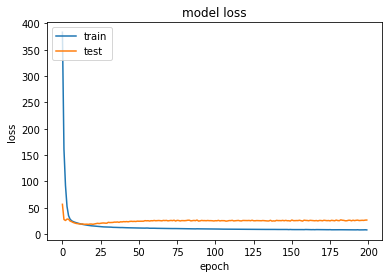

In [59]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

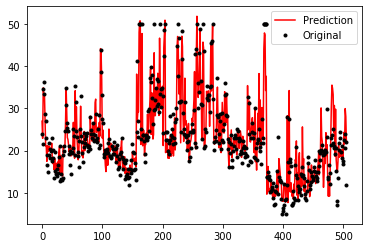

In [60]:
plt.plot(p2, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

### All Inputs

In [96]:
# Start a neural network, building it by layers.
modelall = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 13.
modelall.add(kr.layers.Dense(64, input_dim=13, activation='relu'))
modelall.add(kr.layers.Dense(10, activation="softplus"))
modelall.add(kr.layers.Dense(10, activation="relu"))
modelall.add(kr.layers.Dense(1, activation="softplus"))

# Build the graph./ Try loss mean_squared_error as well.
modelall.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mae'])

In [97]:
history3 = modelall.fit(inputsall, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 239us/step - loss: 576.0242 - accuracy: 0.0000e+00 - mae: 22.0096 - val_loss: 62.5084 - val_accuracy: 0.0000e+00 - val_mae: 6.6527
Epoch 2/1000
404/404 [==============================] - 0s 37us/step - loss: 185.5997 - accuracy: 0.0050 - mae: 10.3986 - val_loss: 305.1367 - val_accuracy: 0.0000e+00 - val_mae: 16.0285
Epoch 3/1000
404/404 [==============================] - 0s 32us/step - loss: 116.2574 - accuracy: 0.0050 - mae: 7.9896 - val_loss: 37.7733 - val_accuracy: 0.0000e+00 - val_mae: 4.7934
Epoch 4/1000
404/404 [==============================] - 0s 35us/step - loss: 95.8615 - accuracy: 0.0124 - mae: 6.9069 - val_loss: 52.2672 - val_accuracy: 0.0000e+00 - val_mae: 5.9269
Epoch 5/1000
404/404 [==============================] - 0s 35us/step - loss: 86.2664 - accuracy: 0.0149 - mae: 7.0509 - val_loss: 29.8191 - val_accuracy: 0.0000e+00 - val_mae: 4.1316
Epoch 6/1000
404/404 [=====

Epoch 46/1000
404/404 [==============================] - 0s 39us/step - loss: 32.1293 - accuracy: 0.0099 - mae: 4.1147 - val_loss: 70.6676 - val_accuracy: 0.0098 - val_mae: 6.6713
Epoch 47/1000
404/404 [==============================] - 0s 32us/step - loss: 29.7159 - accuracy: 0.0074 - mae: 3.9632 - val_loss: 77.4349 - val_accuracy: 0.0000e+00 - val_mae: 7.0900
Epoch 48/1000
404/404 [==============================] - 0s 30us/step - loss: 29.3193 - accuracy: 0.0050 - mae: 3.9500 - val_loss: 75.4942 - val_accuracy: 0.0196 - val_mae: 6.8538
Epoch 49/1000
404/404 [==============================] - 0s 30us/step - loss: 29.5479 - accuracy: 0.0074 - mae: 4.0084 - val_loss: 82.5400 - val_accuracy: 0.0098 - val_mae: 7.3145
Epoch 50/1000
404/404 [==============================] - 0s 30us/step - loss: 28.3598 - accuracy: 0.0149 - mae: 3.9022 - val_loss: 74.7476 - val_accuracy: 0.0098 - val_mae: 6.8394
Epoch 51/1000
404/404 [==============================] - 0s 32us/step - loss: 28.3211 - accuracy

404/404 [==============================] - 0s 30us/step - loss: 18.1698 - accuracy: 0.0050 - mae: 3.0022 - val_loss: 31.5421 - val_accuracy: 0.0098 - val_mae: 4.6834
Epoch 92/1000
404/404 [==============================] - 0s 32us/step - loss: 19.1093 - accuracy: 0.0124 - mae: 3.1459 - val_loss: 35.0839 - val_accuracy: 0.0098 - val_mae: 4.7568
Epoch 93/1000
404/404 [==============================] - 0s 32us/step - loss: 17.9302 - accuracy: 0.0149 - mae: 3.0141 - val_loss: 35.6770 - val_accuracy: 0.0196 - val_mae: 5.0354
Epoch 94/1000
404/404 [==============================] - 0s 32us/step - loss: 18.0070 - accuracy: 0.0149 - mae: 2.9812 - val_loss: 34.6286 - val_accuracy: 0.0196 - val_mae: 4.9158
Epoch 95/1000
404/404 [==============================] - 0s 32us/step - loss: 18.0169 - accuracy: 0.0198 - mae: 3.0280 - val_loss: 37.6028 - val_accuracy: 0.0098 - val_mae: 4.9174
Epoch 96/1000
404/404 [==============================] - 0s 35us/step - loss: 18.0705 - accuracy: 0.0248 - mae: 2.

Epoch 136/1000
404/404 [==============================] - 0s 35us/step - loss: 16.0427 - accuracy: 0.0099 - mae: 2.8533 - val_loss: 35.3316 - val_accuracy: 0.0098 - val_mae: 4.7713
Epoch 137/1000
404/404 [==============================] - 0s 35us/step - loss: 16.8449 - accuracy: 0.0149 - mae: 2.9053 - val_loss: 33.8999 - val_accuracy: 0.0000e+00 - val_mae: 4.7271
Epoch 138/1000
404/404 [==============================] - 0s 32us/step - loss: 17.6488 - accuracy: 0.0124 - mae: 2.9905 - val_loss: 33.7601 - val_accuracy: 0.0098 - val_mae: 4.8879
Epoch 139/1000
404/404 [==============================] - 0s 35us/step - loss: 15.9661 - accuracy: 0.0099 - mae: 2.8577 - val_loss: 28.9203 - val_accuracy: 0.0000e+00 - val_mae: 4.3534
Epoch 140/1000
404/404 [==============================] - 0s 32us/step - loss: 16.1455 - accuracy: 0.0223 - mae: 2.8289 - val_loss: 35.8795 - val_accuracy: 0.0000e+00 - val_mae: 4.8280
Epoch 141/1000
404/404 [==============================] - 0s 30us/step - loss: 15.8

Epoch 181/1000
404/404 [==============================] - 0s 37us/step - loss: 14.5960 - accuracy: 0.0173 - mae: 2.7181 - val_loss: 26.3819 - val_accuracy: 0.0196 - val_mae: 4.1572
Epoch 182/1000
404/404 [==============================] - 0s 35us/step - loss: 14.3454 - accuracy: 0.0173 - mae: 2.6409 - val_loss: 37.7740 - val_accuracy: 0.0000e+00 - val_mae: 4.8872
Epoch 183/1000
404/404 [==============================] - 0s 35us/step - loss: 16.8614 - accuracy: 0.0149 - mae: 2.9642 - val_loss: 29.2074 - val_accuracy: 0.0098 - val_mae: 4.3816
Epoch 184/1000
404/404 [==============================] - 0s 30us/step - loss: 15.4794 - accuracy: 0.0223 - mae: 2.7991 - val_loss: 29.5236 - val_accuracy: 0.0196 - val_mae: 4.4229
Epoch 185/1000
404/404 [==============================] - 0s 32us/step - loss: 14.2632 - accuracy: 0.0198 - mae: 2.7286 - val_loss: 32.0582 - val_accuracy: 0.0000e+00 - val_mae: 4.7818
Epoch 186/1000
404/404 [==============================] - 0s 27us/step - loss: 15.3742 

Epoch 226/1000
404/404 [==============================] - 0s 35us/step - loss: 13.4275 - accuracy: 0.0198 - mae: 2.6033 - val_loss: 39.3823 - val_accuracy: 0.0000e+00 - val_mae: 5.0705
Epoch 227/1000
404/404 [==============================] - 0s 32us/step - loss: 12.9531 - accuracy: 0.0272 - mae: 2.5935 - val_loss: 38.5003 - val_accuracy: 0.0000e+00 - val_mae: 4.9475
Epoch 228/1000
404/404 [==============================] - 0s 30us/step - loss: 14.0651 - accuracy: 0.0198 - mae: 2.6582 - val_loss: 41.7206 - val_accuracy: 0.0000e+00 - val_mae: 5.2315
Epoch 229/1000
404/404 [==============================] - 0s 30us/step - loss: 13.8148 - accuracy: 0.0149 - mae: 2.6751 - val_loss: 51.6494 - val_accuracy: 0.0098 - val_mae: 5.5916
Epoch 230/1000
404/404 [==============================] - 0s 32us/step - loss: 14.3454 - accuracy: 0.0347 - mae: 2.7035 - val_loss: 48.3948 - val_accuracy: 0.0098 - val_mae: 5.4497
Epoch 231/1000
404/404 [==============================] - 0s 32us/step - loss: 14.4

Epoch 271/1000
404/404 [==============================] - 0s 35us/step - loss: 13.5139 - accuracy: 0.0173 - mae: 2.5969 - val_loss: 65.1260 - val_accuracy: 0.0098 - val_mae: 6.0083
Epoch 272/1000
404/404 [==============================] - 0s 35us/step - loss: 13.3386 - accuracy: 0.0223 - mae: 2.6000 - val_loss: 60.4962 - val_accuracy: 0.0098 - val_mae: 5.7731
Epoch 273/1000
404/404 [==============================] - 0s 42us/step - loss: 12.9470 - accuracy: 0.0124 - mae: 2.5958 - val_loss: 70.3377 - val_accuracy: 0.0098 - val_mae: 6.3439
Epoch 274/1000
404/404 [==============================] - 0s 35us/step - loss: 13.2526 - accuracy: 0.0198 - mae: 2.5606 - val_loss: 53.8583 - val_accuracy: 0.0000e+00 - val_mae: 5.5164
Epoch 275/1000
404/404 [==============================] - 0s 35us/step - loss: 12.9889 - accuracy: 0.0173 - mae: 2.6302 - val_loss: 81.2973 - val_accuracy: 0.0196 - val_mae: 6.6976
Epoch 276/1000
404/404 [==============================] - 0s 32us/step - loss: 14.2398 - ac

404/404 [==============================] - 0s 37us/step - loss: 14.7140 - accuracy: 0.0173 - mae: 2.7198 - val_loss: 70.8943 - val_accuracy: 0.0196 - val_mae: 5.9638
Epoch 316/1000
404/404 [==============================] - 0s 32us/step - loss: 12.1121 - accuracy: 0.0173 - mae: 2.5257 - val_loss: 74.6397 - val_accuracy: 0.0000e+00 - val_mae: 6.2851
Epoch 317/1000
404/404 [==============================] - 0s 30us/step - loss: 11.7875 - accuracy: 0.0223 - mae: 2.4913 - val_loss: 79.7587 - val_accuracy: 0.0098 - val_mae: 6.5423
Epoch 318/1000
404/404 [==============================] - 0s 32us/step - loss: 14.1697 - accuracy: 0.0248 - mae: 2.7174 - val_loss: 72.0208 - val_accuracy: 0.0098 - val_mae: 6.4062
Epoch 319/1000
404/404 [==============================] - 0s 32us/step - loss: 14.4737 - accuracy: 0.0124 - mae: 2.7600 - val_loss: 89.9120 - val_accuracy: 0.0098 - val_mae: 6.7164
Epoch 320/1000
404/404 [==============================] - 0s 32us/step - loss: 12.6288 - accuracy: 0.0099 

Epoch 360/1000
404/404 [==============================] - 0s 35us/step - loss: 12.3926 - accuracy: 0.0347 - mae: 2.4577 - val_loss: 66.1678 - val_accuracy: 0.0000e+00 - val_mae: 5.6761
Epoch 361/1000
404/404 [==============================] - 0s 37us/step - loss: 12.1049 - accuracy: 0.0149 - mae: 2.5430 - val_loss: 76.9998 - val_accuracy: 0.0000e+00 - val_mae: 6.6210
Epoch 362/1000
404/404 [==============================] - 0s 35us/step - loss: 11.4397 - accuracy: 0.0223 - mae: 2.4497 - val_loss: 73.6205 - val_accuracy: 0.0098 - val_mae: 6.2353
Epoch 363/1000
404/404 [==============================] - 0s 32us/step - loss: 12.0785 - accuracy: 0.0198 - mae: 2.4884 - val_loss: 64.4497 - val_accuracy: 0.0000e+00 - val_mae: 5.6377
Epoch 364/1000
404/404 [==============================] - 0s 35us/step - loss: 13.0338 - accuracy: 0.0198 - mae: 2.6864 - val_loss: 86.0286 - val_accuracy: 0.0196 - val_mae: 6.5411
Epoch 365/1000
404/404 [==============================] - 0s 32us/step - loss: 10.8

Epoch 405/1000
404/404 [==============================] - 0s 35us/step - loss: 11.3029 - accuracy: 0.0272 - mae: 2.4646 - val_loss: 60.6653 - val_accuracy: 0.0000e+00 - val_mae: 5.6800
Epoch 406/1000
404/404 [==============================] - 0s 30us/step - loss: 12.8617 - accuracy: 0.0248 - mae: 2.5812 - val_loss: 96.0487 - val_accuracy: 0.0000e+00 - val_mae: 7.0048
Epoch 407/1000
404/404 [==============================] - 0s 35us/step - loss: 10.9664 - accuracy: 0.0173 - mae: 2.4017 - val_loss: 73.5755 - val_accuracy: 0.0000e+00 - val_mae: 6.2246
Epoch 408/1000
404/404 [==============================] - 0s 32us/step - loss: 12.0299 - accuracy: 0.0248 - mae: 2.4971 - val_loss: 83.6770 - val_accuracy: 0.0098 - val_mae: 6.6321
Epoch 409/1000
404/404 [==============================] - 0s 30us/step - loss: 11.5767 - accuracy: 0.0173 - mae: 2.4574 - val_loss: 55.7573 - val_accuracy: 0.0098 - val_mae: 5.3386
Epoch 410/1000
404/404 [==============================] - 0s 37us/step - loss: 12.2

Epoch 450/1000
404/404 [==============================] - 0s 32us/step - loss: 11.2496 - accuracy: 0.0248 - mae: 2.3732 - val_loss: 94.8663 - val_accuracy: 0.0098 - val_mae: 6.9566
Epoch 451/1000
404/404 [==============================] - 0s 32us/step - loss: 15.1088 - accuracy: 0.0198 - mae: 2.7951 - val_loss: 88.4902 - val_accuracy: 0.0098 - val_mae: 6.8555
Epoch 452/1000
404/404 [==============================] - 0s 32us/step - loss: 13.4996 - accuracy: 0.0074 - mae: 2.7219 - val_loss: 112.1884 - val_accuracy: 0.0098 - val_mae: 7.4565
Epoch 453/1000
404/404 [==============================] - 0s 35us/step - loss: 12.4047 - accuracy: 0.0173 - mae: 2.5057 - val_loss: 76.5570 - val_accuracy: 0.0000e+00 - val_mae: 6.6357
Epoch 454/1000
404/404 [==============================] - 0s 32us/step - loss: 10.5411 - accuracy: 0.0173 - mae: 2.3168 - val_loss: 90.8593 - val_accuracy: 0.0196 - val_mae: 6.6819
Epoch 455/1000
404/404 [==============================] - 0s 35us/step - loss: 11.2114 - a

404/404 [==============================] - 0s 32us/step - loss: 11.5799 - accuracy: 0.0198 - mae: 2.5313 - val_loss: 85.1583 - val_accuracy: 0.0294 - val_mae: 6.5854
Epoch 496/1000
404/404 [==============================] - 0s 30us/step - loss: 10.1411 - accuracy: 0.0248 - mae: 2.3255 - val_loss: 79.9782 - val_accuracy: 0.0000e+00 - val_mae: 6.4068
Epoch 497/1000
404/404 [==============================] - 0s 37us/step - loss: 10.5936 - accuracy: 0.0198 - mae: 2.2805 - val_loss: 98.6066 - val_accuracy: 0.0294 - val_mae: 7.1509
Epoch 498/1000
404/404 [==============================] - 0s 44us/step - loss: 11.3841 - accuracy: 0.0124 - mae: 2.5109 - val_loss: 62.3291 - val_accuracy: 0.0196 - val_mae: 5.8100
Epoch 499/1000
404/404 [==============================] - 0s 42us/step - loss: 9.5751 - accuracy: 0.0223 - mae: 2.2256 - val_loss: 84.7471 - val_accuracy: 0.0000e+00 - val_mae: 6.7202
Epoch 500/1000
404/404 [==============================] - 0s 35us/step - loss: 10.3419 - accuracy: 0.01

404/404 [==============================] - 0s 32us/step - loss: 8.7311 - accuracy: 0.0198 - mae: 2.1380 - val_loss: 92.6727 - val_accuracy: 0.0000e+00 - val_mae: 6.9446
Epoch 541/1000
404/404 [==============================] - 0s 30us/step - loss: 11.5061 - accuracy: 0.0149 - mae: 2.4215 - val_loss: 82.0286 - val_accuracy: 0.0098 - val_mae: 6.8461
Epoch 542/1000
404/404 [==============================] - 0s 32us/step - loss: 12.0567 - accuracy: 0.0248 - mae: 2.5172 - val_loss: 79.8507 - val_accuracy: 0.0098 - val_mae: 6.5775
Epoch 543/1000
404/404 [==============================] - 0s 30us/step - loss: 10.0119 - accuracy: 0.0272 - mae: 2.2949 - val_loss: 102.3453 - val_accuracy: 0.0098 - val_mae: 7.2365
Epoch 544/1000
404/404 [==============================] - 0s 32us/step - loss: 9.1640 - accuracy: 0.0297 - mae: 2.1579 - val_loss: 75.8376 - val_accuracy: 0.0098 - val_mae: 6.4203
Epoch 545/1000
404/404 [==============================] - 0s 32us/step - loss: 9.7149 - accuracy: 0.0248 - 

Epoch 585/1000
404/404 [==============================] - 0s 37us/step - loss: 8.3773 - accuracy: 0.0198 - mae: 2.1272 - val_loss: 78.6231 - val_accuracy: 0.0098 - val_mae: 6.5815
Epoch 586/1000
404/404 [==============================] - 0s 35us/step - loss: 8.2747 - accuracy: 0.0272 - mae: 2.0833 - val_loss: 105.6642 - val_accuracy: 0.0000e+00 - val_mae: 7.5090
Epoch 587/1000
404/404 [==============================] - 0s 35us/step - loss: 8.2596 - accuracy: 0.0198 - mae: 2.0727 - val_loss: 76.7776 - val_accuracy: 0.0098 - val_mae: 6.4504
Epoch 588/1000
404/404 [==============================] - 0s 32us/step - loss: 8.7319 - accuracy: 0.0297 - mae: 2.1635 - val_loss: 93.2904 - val_accuracy: 0.0098 - val_mae: 6.9404
Epoch 589/1000
404/404 [==============================] - 0s 39us/step - loss: 8.7632 - accuracy: 0.0173 - mae: 2.1929 - val_loss: 78.3777 - val_accuracy: 0.0098 - val_mae: 6.6469
Epoch 590/1000
404/404 [==============================] - 0s 32us/step - loss: 8.9272 - accurac

Epoch 630/1000
404/404 [==============================] - 0s 34us/step - loss: 8.3675 - accuracy: 0.0124 - mae: 2.1317 - val_loss: 106.2604 - val_accuracy: 0.0098 - val_mae: 7.5695
Epoch 631/1000
404/404 [==============================] - 0s 32us/step - loss: 8.7516 - accuracy: 0.0149 - mae: 2.1455 - val_loss: 86.9294 - val_accuracy: 0.0098 - val_mae: 6.7464
Epoch 632/1000
404/404 [==============================] - 0s 32us/step - loss: 7.9413 - accuracy: 0.0272 - mae: 2.0938 - val_loss: 87.2321 - val_accuracy: 0.0098 - val_mae: 6.6817
Epoch 633/1000
404/404 [==============================] - 0s 32us/step - loss: 7.9928 - accuracy: 0.0297 - mae: 2.0296 - val_loss: 82.0580 - val_accuracy: 0.0000e+00 - val_mae: 6.6119
Epoch 634/1000
404/404 [==============================] - 0s 32us/step - loss: 7.9721 - accuracy: 0.0272 - mae: 2.0239 - val_loss: 89.7198 - val_accuracy: 0.0098 - val_mae: 6.7964
Epoch 635/1000
404/404 [==============================] - 0s 32us/step - loss: 8.4313 - accurac

404/404 [==============================] - 0s 32us/step - loss: 8.5568 - accuracy: 0.0173 - mae: 2.1356 - val_loss: 84.0161 - val_accuracy: 0.0000e+00 - val_mae: 6.8398
Epoch 676/1000
404/404 [==============================] - 0s 32us/step - loss: 7.0567 - accuracy: 0.0173 - mae: 1.9736 - val_loss: 98.5351 - val_accuracy: 0.0000e+00 - val_mae: 7.0873
Epoch 677/1000
404/404 [==============================] - 0s 30us/step - loss: 7.0131 - accuracy: 0.0248 - mae: 1.9409 - val_loss: 93.9977 - val_accuracy: 0.0000e+00 - val_mae: 6.8378
Epoch 678/1000
404/404 [==============================] - 0s 32us/step - loss: 6.9303 - accuracy: 0.0272 - mae: 1.9363 - val_loss: 94.6900 - val_accuracy: 0.0000e+00 - val_mae: 7.0121
Epoch 679/1000
404/404 [==============================] - 0s 30us/step - loss: 8.2712 - accuracy: 0.0198 - mae: 2.1149 - val_loss: 93.6233 - val_accuracy: 0.0000e+00 - val_mae: 6.9180
Epoch 680/1000
404/404 [==============================] - ETA: 0s - loss: 5.6757 - accuracy: 0.

404/404 [==============================] - 0s 32us/step - loss: 7.7049 - accuracy: 0.0347 - mae: 2.0570 - val_loss: 91.3020 - val_accuracy: 0.0196 - val_mae: 6.7872
Epoch 720/1000
404/404 [==============================] - 0s 32us/step - loss: 8.4072 - accuracy: 0.0248 - mae: 2.1323 - val_loss: 84.5720 - val_accuracy: 0.0098 - val_mae: 6.6854
Epoch 721/1000
404/404 [==============================] - ETA: 0s - loss: 10.9064 - accuracy: 0.0333 - mae: 2.398 - 0s 30us/step - loss: 9.5975 - accuracy: 0.0124 - mae: 2.2624 - val_loss: 104.1249 - val_accuracy: 0.0000e+00 - val_mae: 7.3683
Epoch 722/1000
404/404 [==============================] - 0s 30us/step - loss: 8.4777 - accuracy: 0.0248 - mae: 2.1920 - val_loss: 80.4796 - val_accuracy: 0.0000e+00 - val_mae: 6.3764
Epoch 723/1000
404/404 [==============================] - 0s 32us/step - loss: 6.6869 - accuracy: 0.0198 - mae: 1.9102 - val_loss: 93.9731 - val_accuracy: 0.0000e+00 - val_mae: 6.9277
Epoch 724/1000
404/404 [====================

Epoch 764/1000
404/404 [==============================] - 0s 37us/step - loss: 7.3960 - accuracy: 0.0124 - mae: 1.9793 - val_loss: 73.0258 - val_accuracy: 0.0000e+00 - val_mae: 5.7442
Epoch 765/1000
404/404 [==============================] - 0s 35us/step - loss: 6.3966 - accuracy: 0.0322 - mae: 1.8485 - val_loss: 77.9783 - val_accuracy: 0.0098 - val_mae: 6.0526
Epoch 766/1000
404/404 [==============================] - 0s 32us/step - loss: 7.6771 - accuracy: 0.0272 - mae: 2.0059 - val_loss: 91.1001 - val_accuracy: 0.0196 - val_mae: 6.5362
Epoch 767/1000
404/404 [==============================] - 0s 32us/step - loss: 7.4749 - accuracy: 0.0223 - mae: 1.9764 - val_loss: 73.1413 - val_accuracy: 0.0196 - val_mae: 5.7736
Epoch 768/1000
404/404 [==============================] - 0s 32us/step - loss: 8.4018 - accuracy: 0.0248 - mae: 2.1472 - val_loss: 75.7655 - val_accuracy: 0.0000e+00 - val_mae: 6.0650
Epoch 769/1000
404/404 [==============================] - 0s 30us/step - loss: 7.5785 - accu

Epoch 809/1000
404/404 [==============================] - 0s 32us/step - loss: 7.3083 - accuracy: 0.0198 - mae: 2.0296 - val_loss: 87.3597 - val_accuracy: 0.0196 - val_mae: 6.2496
Epoch 810/1000
404/404 [==============================] - 0s 30us/step - loss: 6.2735 - accuracy: 0.0223 - mae: 1.8417 - val_loss: 80.6749 - val_accuracy: 0.0000e+00 - val_mae: 5.9827
Epoch 811/1000
404/404 [==============================] - 0s 30us/step - loss: 7.3507 - accuracy: 0.0173 - mae: 2.0023 - val_loss: 76.3641 - val_accuracy: 0.0196 - val_mae: 5.7975
Epoch 812/1000
404/404 [==============================] - 0s 30us/step - loss: 7.2182 - accuracy: 0.0223 - mae: 2.0018 - val_loss: 93.3173 - val_accuracy: 0.0196 - val_mae: 6.2806
Epoch 813/1000
404/404 [==============================] - 0s 35us/step - loss: 7.5648 - accuracy: 0.0198 - mae: 2.0680 - val_loss: 76.6139 - val_accuracy: 0.0098 - val_mae: 5.8461
Epoch 814/1000
404/404 [==============================] - 0s 37us/step - loss: 7.4310 - accuracy

404/404 [==============================] - 0s 32us/step - loss: 6.6372 - accuracy: 0.0173 - mae: 1.9130 - val_loss: 84.2226 - val_accuracy: 0.0098 - val_mae: 5.8573
Epoch 855/1000
404/404 [==============================] - 0s 32us/step - loss: 6.1010 - accuracy: 0.0322 - mae: 1.8191 - val_loss: 81.3870 - val_accuracy: 0.0098 - val_mae: 5.7748
Epoch 856/1000
404/404 [==============================] - 0s 30us/step - loss: 5.9720 - accuracy: 0.0248 - mae: 1.8611 - val_loss: 100.8675 - val_accuracy: 0.0098 - val_mae: 6.3484
Epoch 857/1000
404/404 [==============================] - 0s 32us/step - loss: 5.7024 - accuracy: 0.0272 - mae: 1.7697 - val_loss: 73.9246 - val_accuracy: 0.0098 - val_mae: 5.4025
Epoch 858/1000
404/404 [==============================] - 0s 35us/step - loss: 6.2240 - accuracy: 0.0272 - mae: 1.9325 - val_loss: 91.2405 - val_accuracy: 0.0196 - val_mae: 6.1548
Epoch 859/1000
404/404 [==============================] - 0s 32us/step - loss: 6.3240 - accuracy: 0.0198 - mae: 1.

404/404 [==============================] - 0s 32us/step - loss: 6.0506 - accuracy: 0.0198 - mae: 1.8688 - val_loss: 85.9029 - val_accuracy: 0.0098 - val_mae: 5.6140
Epoch 900/1000
404/404 [==============================] - 0s 37us/step - loss: 5.4837 - accuracy: 0.0248 - mae: 1.7973 - val_loss: 79.5959 - val_accuracy: 0.0098 - val_mae: 5.4012
Epoch 901/1000
404/404 [==============================] - 0s 35us/step - loss: 5.9442 - accuracy: 0.0272 - mae: 1.8583 - val_loss: 77.6037 - val_accuracy: 0.0294 - val_mae: 5.5552
Epoch 902/1000
404/404 [==============================] - 0s 35us/step - loss: 5.9411 - accuracy: 0.0297 - mae: 1.8115 - val_loss: 83.1897 - val_accuracy: 0.0196 - val_mae: 5.5347
Epoch 903/1000
404/404 [==============================] - 0s 32us/step - loss: 5.8622 - accuracy: 0.0272 - mae: 1.8195 - val_loss: 79.6328 - val_accuracy: 0.0000e+00 - val_mae: 5.4229
Epoch 904/1000
404/404 [==============================] - ETA: 0s - loss: 3.6013 - accuracy: 0.0000e+00 - mae: 

404/404 [==============================] - 0s 37us/step - loss: 6.5249 - accuracy: 0.0223 - mae: 1.8845 - val_loss: 79.0720 - val_accuracy: 0.0098 - val_mae: 5.2815
Epoch 945/1000
404/404 [==============================] - 0s 37us/step - loss: 6.1514 - accuracy: 0.0099 - mae: 1.8680 - val_loss: 78.4343 - val_accuracy: 0.0196 - val_mae: 5.3098
Epoch 946/1000
404/404 [==============================] - 0s 39us/step - loss: 6.6532 - accuracy: 0.0248 - mae: 1.9042 - val_loss: 84.7121 - val_accuracy: 0.0000e+00 - val_mae: 5.5849
Epoch 947/1000
404/404 [==============================] - 0s 35us/step - loss: 5.4987 - accuracy: 0.0124 - mae: 1.7889 - val_loss: 79.7987 - val_accuracy: 0.0098 - val_mae: 5.3248
Epoch 948/1000
404/404 [==============================] - 0s 32us/step - loss: 5.6227 - accuracy: 0.0322 - mae: 1.7693 - val_loss: 93.9249 - val_accuracy: 0.0098 - val_mae: 5.7716
Epoch 949/1000
404/404 [==============================] - 0s 35us/step - loss: 5.7104 - accuracy: 0.0149 - mae:

404/404 [==============================] - 0s 32us/step - loss: 6.6017 - accuracy: 0.0297 - mae: 1.9185 - val_loss: 110.0006 - val_accuracy: 0.0000e+00 - val_mae: 6.4482
Epoch 990/1000
404/404 [==============================] - 0s 32us/step - loss: 6.2322 - accuracy: 0.0099 - mae: 1.9304 - val_loss: 74.1645 - val_accuracy: 0.0098 - val_mae: 5.1903
Epoch 991/1000
404/404 [==============================] - 0s 32us/step - loss: 5.3960 - accuracy: 0.0223 - mae: 1.7509 - val_loss: 78.6710 - val_accuracy: 0.0000e+00 - val_mae: 5.3244
Epoch 992/1000
404/404 [==============================] - 0s 32us/step - loss: 4.8592 - accuracy: 0.0248 - mae: 1.6826 - val_loss: 96.5277 - val_accuracy: 0.0098 - val_mae: 5.8167
Epoch 993/1000
404/404 [==============================] - 0s 32us/step - loss: 6.2138 - accuracy: 0.0272 - mae: 1.8842 - val_loss: 84.3471 - val_accuracy: 0.0098 - val_mae: 5.4509
Epoch 994/1000
404/404 [==============================] - 0s 32us/step - loss: 6.0146 - accuracy: 0.0149 -

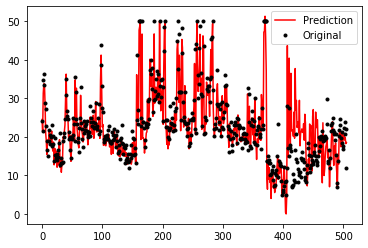

In [95]:
p3 = modelall.predict(inputsall)
plt.plot(p3, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

In [64]:
p

array([[28.06212  ],
       [23.118303 ],
       [30.795572 ],
       [35.231167 ],
       [34.72529  ],
       [29.077923 ],
       [21.41479  ],
       [20.692215 ],
       [15.854395 ],
       [20.25348  ],
       [20.87776  ],
       [21.243137 ],
       [20.11952  ],
       [20.358496 ],
       [20.0754   ],
       [19.582487 ],
       [20.434444 ],
       [18.23847  ],
       [16.240826 ],
       [17.794342 ],
       [14.017078 ],
       [18.378334 ],
       [17.037281 ],
       [14.9482   ],
       [16.846617 ],
       [14.744523 ],
       [17.208601 ],
       [16.93451  ],
       [21.485313 ],
       [22.819662 ],
       [14.810184 ],
       [19.193209 ],
       [16.909176 ],
       [14.545125 ],
       [16.328571 ],
       [20.206564 ],
       [19.543575 ],
       [20.023806 ],
       [20.311089 ],
       [27.008923 ],
       [36.06202  ],
       [27.194223 ],
       [23.769716 ],
       [24.006147 ],
       [21.729395 ],
       [19.29517  ],
       [18.550325 ],
       [18.32

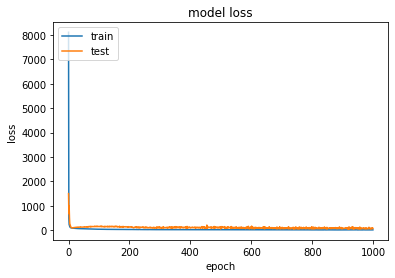

In [65]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### all Inputs whitening

In [98]:
inputsallscale = pd.DataFrame(pre.scale(inputsall), columns=inputsall.columns)
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputsallscale)
inputsallscale_white = pd.DataFrame(pca.transform(inputsallscale), columns=inputsallscale.columns)
history4 = modelall.fit(inputsallscale_white, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 35us/step - loss: 562.2679 - accuracy: 0.0000e+00 - mae: 21.7209 - val_loss: 212.3755 - val_accuracy: 0.0000e+00 - val_mae: 13.6570
Epoch 2/1000
404/404 [==============================] - 0s 39us/step - loss: 470.6133 - accuracy: 0.0000e+00 - mae: 19.3640 - val_loss: 155.0408 - val_accuracy: 0.0000e+00 - val_mae: 11.2918
Epoch 3/1000
404/404 [==============================] - 0s 39us/step - loss: 313.8089 - accuracy: 0.0000e+00 - mae: 14.5204 - val_loss: 81.0726 - val_accuracy: 0.0000e+00 - val_mae: 7.4550
Epoch 4/1000
404/404 [==============================] - 0s 39us/step - loss: 152.5829 - accuracy: 0.0025 - mae: 9.0987 - val_loss: 41.5449 - val_accuracy: 0.0000e+00 - val_mae: 5.3753
Epoch 5/1000
404/404 [==============================] - 0s 42us/step - loss: 74.0433 - accuracy: 0.0050 - mae: 6.6163 - val_loss: 36.4953 - val_accuracy: 0.0000e+00 - val_mae: 4.9433
Epoch 6/1000
404

404/404 [==============================] - 0s 35us/step - loss: 9.1561 - accuracy: 0.0198 - mae: 2.1774 - val_loss: 25.0815 - val_accuracy: 0.0000e+00 - val_mae: 3.8910
Epoch 46/1000
404/404 [==============================] - 0s 44us/step - loss: 9.1512 - accuracy: 0.0173 - mae: 2.1779 - val_loss: 25.0346 - val_accuracy: 0.0000e+00 - val_mae: 3.8919
Epoch 47/1000
404/404 [==============================] - 0s 52us/step - loss: 9.0166 - accuracy: 0.0173 - mae: 2.1614 - val_loss: 25.0558 - val_accuracy: 0.0000e+00 - val_mae: 3.8856
Epoch 48/1000
404/404 [==============================] - 0s 37us/step - loss: 8.9245 - accuracy: 0.0173 - mae: 2.1519 - val_loss: 25.2542 - val_accuracy: 0.0000e+00 - val_mae: 3.8932
Epoch 49/1000
404/404 [==============================] - 0s 35us/step - loss: 8.7492 - accuracy: 0.0198 - mae: 2.1225 - val_loss: 25.5013 - val_accuracy: 0.0000e+00 - val_mae: 3.9207
Epoch 50/1000
404/404 [==============================] - 0s 32us/step - loss: 8.6515 - accuracy: 0.

404/404 [==============================] - 0s 32us/step - loss: 6.1897 - accuracy: 0.0223 - mae: 1.7986 - val_loss: 30.7640 - val_accuracy: 0.0000e+00 - val_mae: 4.2174
Epoch 90/1000
404/404 [==============================] - 0s 32us/step - loss: 6.1500 - accuracy: 0.0198 - mae: 1.7894 - val_loss: 30.8516 - val_accuracy: 0.0000e+00 - val_mae: 4.2226
Epoch 91/1000
404/404 [==============================] - 0s 30us/step - loss: 6.1569 - accuracy: 0.0248 - mae: 1.7858 - val_loss: 31.0493 - val_accuracy: 0.0000e+00 - val_mae: 4.2420
Epoch 92/1000
404/404 [==============================] - 0s 32us/step - loss: 6.2031 - accuracy: 0.0272 - mae: 1.8019 - val_loss: 31.8825 - val_accuracy: 0.0000e+00 - val_mae: 4.2594
Epoch 93/1000
404/404 [==============================] - 0s 32us/step - loss: 6.0702 - accuracy: 0.0272 - mae: 1.7844 - val_loss: 31.5316 - val_accuracy: 0.0000e+00 - val_mae: 4.2534
Epoch 94/1000
404/404 [==============================] - 0s 30us/step - loss: 6.0600 - accuracy: 0.

Epoch 134/1000
404/404 [==============================] - 0s 35us/step - loss: 4.7339 - accuracy: 0.0322 - mae: 1.5844 - val_loss: 36.2698 - val_accuracy: 0.0000e+00 - val_mae: 4.4531
Epoch 135/1000
404/404 [==============================] - 0s 37us/step - loss: 4.6892 - accuracy: 0.0347 - mae: 1.5667 - val_loss: 35.5182 - val_accuracy: 0.0000e+00 - val_mae: 4.4309
Epoch 136/1000
404/404 [==============================] - 0s 35us/step - loss: 4.6514 - accuracy: 0.0322 - mae: 1.5694 - val_loss: 35.7203 - val_accuracy: 0.0000e+00 - val_mae: 4.4328
Epoch 137/1000
404/404 [==============================] - 0s 32us/step - loss: 4.6266 - accuracy: 0.0297 - mae: 1.5726 - val_loss: 36.6007 - val_accuracy: 0.0000e+00 - val_mae: 4.4626
Epoch 138/1000
404/404 [==============================] - 0s 37us/step - loss: 4.6112 - accuracy: 0.0248 - mae: 1.5693 - val_loss: 37.0489 - val_accuracy: 0.0000e+00 - val_mae: 4.4833
Epoch 139/1000
404/404 [==============================] - 0s 32us/step - loss: 4

404/404 [==============================] - 0s 30us/step - loss: 3.8631 - accuracy: 0.0198 - mae: 1.4453 - val_loss: 41.8060 - val_accuracy: 0.0000e+00 - val_mae: 4.6838
Epoch 180/1000
404/404 [==============================] - 0s 30us/step - loss: 3.8529 - accuracy: 0.0223 - mae: 1.4470 - val_loss: 41.9457 - val_accuracy: 0.0098 - val_mae: 4.6699
Epoch 181/1000
404/404 [==============================] - 0s 30us/step - loss: 3.8721 - accuracy: 0.0149 - mae: 1.4461 - val_loss: 41.3424 - val_accuracy: 0.0098 - val_mae: 4.6657
Epoch 182/1000
404/404 [==============================] - 0s 30us/step - loss: 3.8652 - accuracy: 0.0248 - mae: 1.4442 - val_loss: 42.4626 - val_accuracy: 0.0000e+00 - val_mae: 4.7154
Epoch 183/1000
404/404 [==============================] - 0s 30us/step - loss: 3.8708 - accuracy: 0.0198 - mae: 1.4588 - val_loss: 42.0798 - val_accuracy: 0.0000e+00 - val_mae: 4.7035
Epoch 184/1000
404/404 [==============================] - 0s 30us/step - loss: 3.8482 - accuracy: 0.022

Epoch 224/1000
404/404 [==============================] - 0s 39us/step - loss: 3.3301 - accuracy: 0.0272 - mae: 1.3449 - val_loss: 47.7568 - val_accuracy: 0.0000e+00 - val_mae: 4.9360
Epoch 225/1000
404/404 [==============================] - 0s 44us/step - loss: 3.3235 - accuracy: 0.0198 - mae: 1.3547 - val_loss: 48.2980 - val_accuracy: 0.0000e+00 - val_mae: 4.9519
Epoch 226/1000
404/404 [==============================] - 0s 35us/step - loss: 3.3680 - accuracy: 0.0173 - mae: 1.3646 - val_loss: 48.8634 - val_accuracy: 0.0000e+00 - val_mae: 4.9717
Epoch 227/1000
404/404 [==============================] - 0s 32us/step - loss: 3.2766 - accuracy: 0.0198 - mae: 1.3436 - val_loss: 48.1677 - val_accuracy: 0.0000e+00 - val_mae: 4.9488
Epoch 228/1000
404/404 [==============================] - 0s 30us/step - loss: 3.2859 - accuracy: 0.0223 - mae: 1.3504 - val_loss: 49.4365 - val_accuracy: 0.0000e+00 - val_mae: 5.0122
Epoch 229/1000
404/404 [==============================] - 0s 30us/step - loss: 3

404/404 [==============================] - 0s 32us/step - loss: 2.8827 - accuracy: 0.0248 - mae: 1.2604 - val_loss: 54.6601 - val_accuracy: 0.0000e+00 - val_mae: 5.2186
Epoch 269/1000
404/404 [==============================] - 0s 32us/step - loss: 2.8837 - accuracy: 0.0198 - mae: 1.2631 - val_loss: 55.4823 - val_accuracy: 0.0000e+00 - val_mae: 5.2283
Epoch 270/1000
404/404 [==============================] - 0s 32us/step - loss: 2.8445 - accuracy: 0.0248 - mae: 1.2496 - val_loss: 54.8172 - val_accuracy: 0.0000e+00 - val_mae: 5.2130
Epoch 271/1000
404/404 [==============================] - 0s 32us/step - loss: 2.8412 - accuracy: 0.0248 - mae: 1.2562 - val_loss: 56.5331 - val_accuracy: 0.0000e+00 - val_mae: 5.2776
Epoch 272/1000
404/404 [==============================] - 0s 30us/step - loss: 2.8426 - accuracy: 0.0223 - mae: 1.2604 - val_loss: 56.0207 - val_accuracy: 0.0000e+00 - val_mae: 5.2750
Epoch 273/1000
404/404 [==============================] - 0s 35us/step - loss: 2.8284 - accurac

404/404 [==============================] - 0s 32us/step - loss: 2.4935 - accuracy: 0.0322 - mae: 1.1646 - val_loss: 62.6269 - val_accuracy: 0.0000e+00 - val_mae: 5.5623
Epoch 313/1000
404/404 [==============================] - 0s 35us/step - loss: 2.5355 - accuracy: 0.0347 - mae: 1.1744 - val_loss: 62.8228 - val_accuracy: 0.0000e+00 - val_mae: 5.5804
Epoch 314/1000
404/404 [==============================] - 0s 37us/step - loss: 2.4790 - accuracy: 0.0396 - mae: 1.1648 - val_loss: 63.4557 - val_accuracy: 0.0000e+00 - val_mae: 5.6096
Epoch 315/1000
404/404 [==============================] - 0s 37us/step - loss: 2.4659 - accuracy: 0.0297 - mae: 1.1661 - val_loss: 63.2318 - val_accuracy: 0.0000e+00 - val_mae: 5.5941
Epoch 316/1000
404/404 [==============================] - 0s 37us/step - loss: 2.4627 - accuracy: 0.0322 - mae: 1.1573 - val_loss: 63.3942 - val_accuracy: 0.0000e+00 - val_mae: 5.6053
Epoch 317/1000
404/404 [==============================] - 0s 37us/step - loss: 2.4756 - accurac

404/404 [==============================] - 0s 35us/step - loss: 2.2373 - accuracy: 0.0371 - mae: 1.0941 - val_loss: 68.1057 - val_accuracy: 0.0098 - val_mae: 5.8102
Epoch 358/1000
404/404 [==============================] - 0s 32us/step - loss: 2.2011 - accuracy: 0.0421 - mae: 1.0880 - val_loss: 71.1465 - val_accuracy: 0.0000e+00 - val_mae: 5.9203
Epoch 359/1000
404/404 [==============================] - 0s 39us/step - loss: 2.1859 - accuracy: 0.0495 - mae: 1.0843 - val_loss: 69.2575 - val_accuracy: 0.0098 - val_mae: 5.8424
Epoch 360/1000
404/404 [==============================] - 0s 49us/step - loss: 2.1994 - accuracy: 0.0371 - mae: 1.0827 - val_loss: 70.8593 - val_accuracy: 0.0000e+00 - val_mae: 5.9112
Epoch 361/1000
404/404 [==============================] - 0s 49us/step - loss: 2.1961 - accuracy: 0.0396 - mae: 1.0892 - val_loss: 70.1880 - val_accuracy: 0.0098 - val_mae: 5.8785
Epoch 362/1000
404/404 [==============================] - 0s 39us/step - loss: 2.1901 - accuracy: 0.0421 - 

404/404 [==============================] - 0s 32us/step - loss: 1.9500 - accuracy: 0.0470 - mae: 1.0098 - val_loss: 76.4075 - val_accuracy: 0.0098 - val_mae: 6.1319
Epoch 403/1000
404/404 [==============================] - 0s 35us/step - loss: 1.9598 - accuracy: 0.0421 - mae: 1.0156 - val_loss: 75.2185 - val_accuracy: 0.0098 - val_mae: 6.0905
Epoch 404/1000
404/404 [==============================] - 0s 35us/step - loss: 1.9417 - accuracy: 0.0470 - mae: 1.0165 - val_loss: 78.2883 - val_accuracy: 0.0098 - val_mae: 6.2202
Epoch 405/1000
404/404 [==============================] - 0s 35us/step - loss: 1.9436 - accuracy: 0.0470 - mae: 1.0234 - val_loss: 77.1540 - val_accuracy: 0.0098 - val_mae: 6.1779
Epoch 406/1000
404/404 [==============================] - 0s 37us/step - loss: 1.9214 - accuracy: 0.0495 - mae: 1.0102 - val_loss: 76.2266 - val_accuracy: 0.0098 - val_mae: 6.1184
Epoch 407/1000
404/404 [==============================] - 0s 35us/step - loss: 1.9427 - accuracy: 0.0470 - mae: 1.0

404/404 [==============================] - 0s 35us/step - loss: 1.7415 - accuracy: 0.0446 - mae: 0.9753 - val_loss: 81.1413 - val_accuracy: 0.0196 - val_mae: 6.3462
Epoch 448/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7012 - accuracy: 0.0520 - mae: 0.9540 - val_loss: 86.3871 - val_accuracy: 0.0294 - val_mae: 6.5670
Epoch 449/1000
404/404 [==============================] - 0s 32us/step - loss: 1.7869 - accuracy: 0.0545 - mae: 0.9794 - val_loss: 81.2166 - val_accuracy: 0.0196 - val_mae: 6.3512
Epoch 450/1000
404/404 [==============================] - 0s 32us/step - loss: 1.6893 - accuracy: 0.0594 - mae: 0.9509 - val_loss: 83.3979 - val_accuracy: 0.0196 - val_mae: 6.4510
Epoch 451/1000
404/404 [==============================] - 0s 37us/step - loss: 1.7430 - accuracy: 0.0495 - mae: 0.9691 - val_loss: 85.4315 - val_accuracy: 0.0196 - val_mae: 6.5265
Epoch 452/1000
404/404 [==============================] - 0s 37us/step - loss: 1.6962 - accuracy: 0.0545 - mae: 0.9

404/404 [==============================] - 0s 37us/step - loss: 1.5282 - accuracy: 0.0470 - mae: 0.9053 - val_loss: 88.6243 - val_accuracy: 0.0196 - val_mae: 6.6660
Epoch 493/1000
404/404 [==============================] - 0s 37us/step - loss: 1.5176 - accuracy: 0.0569 - mae: 0.8996 - val_loss: 90.5631 - val_accuracy: 0.0196 - val_mae: 6.7577
Epoch 494/1000
404/404 [==============================] - 0s 35us/step - loss: 1.4723 - accuracy: 0.0520 - mae: 0.8764 - val_loss: 88.3403 - val_accuracy: 0.0196 - val_mae: 6.6631
Epoch 495/1000
404/404 [==============================] - 0s 35us/step - loss: 1.4912 - accuracy: 0.0545 - mae: 0.8936 - val_loss: 91.5578 - val_accuracy: 0.0196 - val_mae: 6.8007
Epoch 496/1000
404/404 [==============================] - 0s 35us/step - loss: 1.5411 - accuracy: 0.0594 - mae: 0.9011 - val_loss: 88.3456 - val_accuracy: 0.0196 - val_mae: 6.6536
Epoch 497/1000
404/404 [==============================] - 0s 37us/step - loss: 1.4846 - accuracy: 0.0594 - mae: 0.8

404/404 [==============================] - 0s 32us/step - loss: 1.3003 - accuracy: 0.0569 - mae: 0.8391 - val_loss: 92.5519 - val_accuracy: 0.0196 - val_mae: 6.8691
Epoch 538/1000
404/404 [==============================] - 0s 35us/step - loss: 1.3524 - accuracy: 0.0668 - mae: 0.8474 - val_loss: 92.0573 - val_accuracy: 0.0196 - val_mae: 6.8561
Epoch 539/1000
404/404 [==============================] - 0s 30us/step - loss: 1.2621 - accuracy: 0.0619 - mae: 0.8166 - val_loss: 91.7914 - val_accuracy: 0.0196 - val_mae: 6.8348
Epoch 540/1000
404/404 [==============================] - 0s 27us/step - loss: 1.2666 - accuracy: 0.0619 - mae: 0.8137 - val_loss: 94.6982 - val_accuracy: 0.0196 - val_mae: 6.9581
Epoch 541/1000
404/404 [==============================] - 0s 30us/step - loss: 1.3007 - accuracy: 0.0619 - mae: 0.8233 - val_loss: 94.6087 - val_accuracy: 0.0196 - val_mae: 6.9589
Epoch 542/1000
404/404 [==============================] - 0s 37us/step - loss: 1.2420 - accuracy: 0.0594 - mae: 0.8

404/404 [==============================] - 0s 35us/step - loss: 1.1145 - accuracy: 0.0718 - mae: 0.7618 - val_loss: 98.3493 - val_accuracy: 0.0098 - val_mae: 7.1011
Epoch 583/1000
404/404 [==============================] - 0s 32us/step - loss: 1.1501 - accuracy: 0.0619 - mae: 0.7741 - val_loss: 97.0567 - val_accuracy: 0.0098 - val_mae: 7.0619
Epoch 584/1000
404/404 [==============================] - 0s 30us/step - loss: 1.0873 - accuracy: 0.0693 - mae: 0.7492 - val_loss: 98.8055 - val_accuracy: 0.0098 - val_mae: 7.1204
Epoch 585/1000
404/404 [==============================] - 0s 27us/step - loss: 1.1152 - accuracy: 0.0619 - mae: 0.7639 - val_loss: 97.2368 - val_accuracy: 0.0098 - val_mae: 7.0646
Epoch 586/1000
404/404 [==============================] - 0s 27us/step - loss: 1.1051 - accuracy: 0.0718 - mae: 0.7620 - val_loss: 99.4278 - val_accuracy: 0.0098 - val_mae: 7.1660
Epoch 587/1000
404/404 [==============================] - 0s 30us/step - loss: 1.0929 - accuracy: 0.0668 - mae: 0.7

404/404 [==============================] - 0s 37us/step - loss: 0.9934 - accuracy: 0.0842 - mae: 0.7220 - val_loss: 102.2140 - val_accuracy: 0.0098 - val_mae: 7.2886
Epoch 628/1000
404/404 [==============================] - 0s 35us/step - loss: 0.9257 - accuracy: 0.0743 - mae: 0.7018 - val_loss: 102.1011 - val_accuracy: 0.0098 - val_mae: 7.2636
Epoch 629/1000
404/404 [==============================] - 0s 32us/step - loss: 0.9657 - accuracy: 0.0842 - mae: 0.7084 - val_loss: 105.8888 - val_accuracy: 0.0098 - val_mae: 7.4258
Epoch 630/1000
404/404 [==============================] - 0s 30us/step - loss: 0.9406 - accuracy: 0.0792 - mae: 0.7070 - val_loss: 105.1840 - val_accuracy: 0.0098 - val_mae: 7.4049
Epoch 631/1000
404/404 [==============================] - 0s 30us/step - loss: 0.9577 - accuracy: 0.0668 - mae: 0.7157 - val_loss: 103.2966 - val_accuracy: 0.0098 - val_mae: 7.3094
Epoch 632/1000
404/404 [==============================] - 0s 32us/step - loss: 0.9384 - accuracy: 0.0743 - mae

404/404 [==============================] - 0s 32us/step - loss: 0.7814 - accuracy: 0.0866 - mae: 0.6306 - val_loss: 110.5577 - val_accuracy: 0.0000e+00 - val_mae: 7.5801
Epoch 673/1000
404/404 [==============================] - 0s 32us/step - loss: 0.7896 - accuracy: 0.0916 - mae: 0.6439 - val_loss: 111.0073 - val_accuracy: 0.0000e+00 - val_mae: 7.6360
Epoch 674/1000
404/404 [==============================] - 0s 35us/step - loss: 0.8091 - accuracy: 0.0916 - mae: 0.6631 - val_loss: 107.1033 - val_accuracy: 0.0098 - val_mae: 7.4639
Epoch 675/1000
404/404 [==============================] - 0s 30us/step - loss: 0.8269 - accuracy: 0.0842 - mae: 0.6657 - val_loss: 107.6114 - val_accuracy: 0.0098 - val_mae: 7.4664
Epoch 676/1000
404/404 [==============================] - 0s 32us/step - loss: 0.8160 - accuracy: 0.0767 - mae: 0.6569 - val_loss: 110.6088 - val_accuracy: 0.0098 - val_mae: 7.5906
Epoch 677/1000
404/404 [==============================] - 0s 32us/step - loss: 0.7729 - accuracy: 0.10

404/404 [==============================] - 0s 32us/step - loss: 0.6707 - accuracy: 0.1015 - mae: 0.5844 - val_loss: 114.6717 - val_accuracy: 0.0098 - val_mae: 7.7392
Epoch 718/1000
404/404 [==============================] - 0s 30us/step - loss: 0.6593 - accuracy: 0.1015 - mae: 0.5822 - val_loss: 113.2018 - val_accuracy: 0.0196 - val_mae: 7.6779
Epoch 719/1000
404/404 [==============================] - 0s 30us/step - loss: 0.6979 - accuracy: 0.1040 - mae: 0.6008 - val_loss: 114.8599 - val_accuracy: 0.0196 - val_mae: 7.7277
Epoch 720/1000
404/404 [==============================] - 0s 30us/step - loss: 0.6801 - accuracy: 0.1015 - mae: 0.5870 - val_loss: 115.3668 - val_accuracy: 0.0098 - val_mae: 7.7861
Epoch 721/1000
404/404 [==============================] - 0s 32us/step - loss: 0.6762 - accuracy: 0.1015 - mae: 0.5868 - val_loss: 114.9378 - val_accuracy: 0.0098 - val_mae: 7.7564
Epoch 722/1000
404/404 [==============================] - 0s 27us/step - loss: 0.6969 - accuracy: 0.0916 - mae

404/404 [==============================] - 0s 42us/step - loss: 0.6461 - accuracy: 0.1015 - mae: 0.5892 - val_loss: 119.4869 - val_accuracy: 0.0098 - val_mae: 7.9054
Epoch 763/1000
404/404 [==============================] - 0s 44us/step - loss: 0.5963 - accuracy: 0.0941 - mae: 0.5618 - val_loss: 117.3523 - val_accuracy: 0.0098 - val_mae: 7.8411
Epoch 764/1000
404/404 [==============================] - 0s 37us/step - loss: 0.6043 - accuracy: 0.0965 - mae: 0.5560 - val_loss: 118.6950 - val_accuracy: 0.0098 - val_mae: 7.8814
Epoch 765/1000
404/404 [==============================] - 0s 35us/step - loss: 0.6002 - accuracy: 0.1040 - mae: 0.5515 - val_loss: 118.9553 - val_accuracy: 0.0098 - val_mae: 7.8971
Epoch 766/1000
404/404 [==============================] - 0s 37us/step - loss: 0.5836 - accuracy: 0.0941 - mae: 0.5593 - val_loss: 119.0402 - val_accuracy: 0.0098 - val_mae: 7.8780
Epoch 767/1000
404/404 [==============================] - 0s 35us/step - loss: 0.5783 - accuracy: 0.1064 - mae

404/404 [==============================] - 0s 35us/step - loss: 0.4723 - accuracy: 0.1064 - mae: 0.4944 - val_loss: 122.0668 - val_accuracy: 0.0098 - val_mae: 8.0107
Epoch 808/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4888 - accuracy: 0.0990 - mae: 0.4995 - val_loss: 121.8855 - val_accuracy: 0.0098 - val_mae: 7.9901
Epoch 809/1000
404/404 [==============================] - 0s 37us/step - loss: 0.4860 - accuracy: 0.1089 - mae: 0.5008 - val_loss: 124.5368 - val_accuracy: 0.0098 - val_mae: 8.0760
Epoch 810/1000
404/404 [==============================] - 0s 35us/step - loss: 0.4795 - accuracy: 0.1114 - mae: 0.5008 - val_loss: 126.3213 - val_accuracy: 0.0000e+00 - val_mae: 8.1434
Epoch 811/1000
404/404 [==============================] - 0s 35us/step - loss: 0.4472 - accuracy: 0.1114 - mae: 0.4737 - val_loss: 124.8144 - val_accuracy: 0.0000e+00 - val_mae: 8.1007
Epoch 812/1000
404/404 [==============================] - ETA: 0s - loss: 0.5935 - accuracy: 0.1333 - 

404/404 [==============================] - 0s 35us/step - loss: 0.4010 - accuracy: 0.1064 - mae: 0.4538 - val_loss: 126.5603 - val_accuracy: 0.0098 - val_mae: 8.0867
Epoch 852/1000
404/404 [==============================] - 0s 35us/step - loss: 0.4174 - accuracy: 0.1188 - mae: 0.4587 - val_loss: 126.0846 - val_accuracy: 0.0196 - val_mae: 8.0926
Epoch 853/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4751 - accuracy: 0.0990 - mae: 0.5079 - val_loss: 127.1828 - val_accuracy: 0.0098 - val_mae: 8.1170
Epoch 854/1000
404/404 [==============================] - 0s 30us/step - loss: 0.4385 - accuracy: 0.1040 - mae: 0.4833 - val_loss: 124.9901 - val_accuracy: 0.0196 - val_mae: 8.0355
Epoch 855/1000
404/404 [==============================] - 0s 30us/step - loss: 0.4073 - accuracy: 0.1163 - mae: 0.4680 - val_loss: 126.6778 - val_accuracy: 0.0098 - val_mae: 8.0969
Epoch 856/1000
404/404 [==============================] - 0s 35us/step - loss: 0.4034 - accuracy: 0.1139 - mae

Epoch 896/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3593 - accuracy: 0.1139 - mae: 0.4251 - val_loss: 132.1910 - val_accuracy: 0.0000e+00 - val_mae: 8.2333
Epoch 897/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3625 - accuracy: 0.1139 - mae: 0.4314 - val_loss: 131.6003 - val_accuracy: 0.0000e+00 - val_mae: 8.1935
Epoch 898/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3492 - accuracy: 0.1139 - mae: 0.4300 - val_loss: 132.4235 - val_accuracy: 0.0000e+00 - val_mae: 8.2208
Epoch 899/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3557 - accuracy: 0.1040 - mae: 0.4330 - val_loss: 132.3408 - val_accuracy: 0.0000e+00 - val_mae: 8.2397
Epoch 900/1000
404/404 [==============================] - 0s 30us/step - loss: 0.3337 - accuracy: 0.1139 - mae: 0.4105 - val_loss: 131.1671 - val_accuracy: 0.0000e+00 - val_mae: 8.1815
Epoch 901/1000
404/404 [==============================] - 0s 32us/step - lo

404/404 [==============================] - 0s 32us/step - loss: 0.3034 - accuracy: 0.1163 - mae: 0.3966 - val_loss: 136.2623 - val_accuracy: 0.0000e+00 - val_mae: 8.3051
Epoch 941/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2936 - accuracy: 0.1139 - mae: 0.3916 - val_loss: 138.7114 - val_accuracy: 0.0000e+00 - val_mae: 8.3430
Epoch 942/1000
404/404 [==============================] - 0s 42us/step - loss: 0.3069 - accuracy: 0.1213 - mae: 0.3980 - val_loss: 137.5302 - val_accuracy: 0.0000e+00 - val_mae: 8.3439
Epoch 943/1000
404/404 [==============================] - 0s 44us/step - loss: 0.2969 - accuracy: 0.1163 - mae: 0.3938 - val_loss: 141.5086 - val_accuracy: 0.0000e+00 - val_mae: 8.4666
Epoch 944/1000
404/404 [==============================] - 0s 37us/step - loss: 0.3034 - accuracy: 0.1213 - mae: 0.3912 - val_loss: 137.6163 - val_accuracy: 0.0000e+00 - val_mae: 8.3276
Epoch 945/1000
404/404 [==============================] - 0s 35us/step - loss: 0.2948 - ac

404/404 [==============================] - 0s 32us/step - loss: 0.2541 - accuracy: 0.1213 - mae: 0.3506 - val_loss: 141.8214 - val_accuracy: 0.0000e+00 - val_mae: 8.3872
Epoch 985/1000
404/404 [==============================] - 0s 37us/step - loss: 0.2821 - accuracy: 0.1238 - mae: 0.3814 - val_loss: 141.5518 - val_accuracy: 0.0000e+00 - val_mae: 8.3702
Epoch 986/1000
404/404 [==============================] - 0s 37us/step - loss: 0.2783 - accuracy: 0.1089 - mae: 0.3783 - val_loss: 141.4630 - val_accuracy: 0.0000e+00 - val_mae: 8.4024
Epoch 987/1000
404/404 [==============================] - 0s 39us/step - loss: 0.2534 - accuracy: 0.1213 - mae: 0.3621 - val_loss: 142.8814 - val_accuracy: 0.0000e+00 - val_mae: 8.3958
Epoch 988/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2566 - accuracy: 0.1238 - mae: 0.3570 - val_loss: 139.9240 - val_accuracy: 0.0000e+00 - val_mae: 8.3222
Epoch 989/1000
404/404 [==============================] - 0s 35us/step - loss: 0.2419 - ac

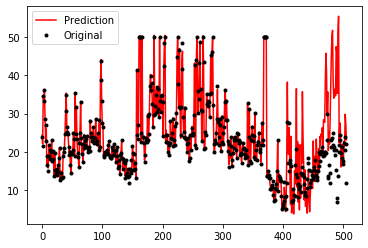

In [99]:
p4 = modelall.predict(inputsallscale_white)
plt.plot(p4, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

## References

[1] - https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

[2] - https://rpubs.com/chocka314/251613 Look at this one for the actual vs prediction plot.

[3] - https://scikit-learn.org/stable/modules/preprocessing.html